# **Smartphone Recommendation System**

**Description** : Proses pembuatan model untuk rekomendasi smartphone

**Dataset** : https://www.kaggle.com/datasets/abdulmalik1518/mobiles-dataset-2025 & https://www.kaggle.com/datasets/ireddragonicy/antutu-benchmark

**Model** : Weight Sum Model (WSM) & Learning to Rank (LTR)

# **Data Loading**

Pada bagian ini, langkah pertama adalah membaca dataset secara langsung dari folder dataset "Mobiles Dataset (2025)" yang sudah di download melalui Kaggle. Dataset yang digunakan adalah Mobiles Dataset (2025).csv yang berisi dataset untuk proses pelatihan model. Tetapi karena kolom processor hanya berupa nama processor, akan digunakan dataset tambahan (Android_SoC.csv dan iOS_Performance.csv) dari antutu benchmark untuk mengubah nilai processor menambahkan data hasil benchmark dari setiap processor sebagai representasi kemampuan setiap processor. Data di transformasi secara dasar tanpa penambahan atau pengurangan data sebagai persiapan untuk Exploratory Data Analysis (EDA).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import os
import re

## **Dataset 1**

Load Mobiles Dataset (2025).csv Dataset

In [ ]:
# Path to file
file_path = "/kaggle/input/mobiles-dataset-2025/Mobiles Dataset (2025).csv"

# Load dataset ke Pandas DataFrame
df1 = pd.read_csv(file_path, encoding="ISO-8859-1")

df1.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [ ]:
print(df1["Processor"].unique())

['A17 Bionic' 'A17 Pro' 'A16 Bionic' 'A15 Bionic' 'A14 Bionic'
 'A13 Bionic' 'A11 Bionic' 'A12 Bionic' 'A12Z Bionic' 'Exynos 2400'
 'Snapdragon 8 Gen 2' 'Exynos 2200' 'Snapdragon 8 Gen 1' 'Exynos 1380'
 'MediaTek Dimensity 1080' 'MediaTek Helio G99' 'Exynos 850' 'Exynos 1280'
 'MediaTek Helio P35' 'Exynos 990' 'Exynos 9825' 'Snapdragon 450'
 'Exynos 7870' 'Snapdragon 425' 'Exynos 7570' 'Snapdragon 653'
 'Snapdragon 625' 'Snapdragon 617' 'Snapdragon 888' 'Snapdragon 695'
 'Unisoc T618' 'MediaTek Helio P22T' 'Snapdragon 778G' 'Exynos 9810'
 'Spreadtrum SC8830' 'Qualcomm MSM8916' 'Snapdragon 8 Gen 3'
 'MediaTek Dimensity 9000' 'Snapdragon 782G' 'MediaTek Dimensity 6020'
 'Snapdragon 8+ Gen 1' 'MediaTek Dimensity 1300'
 'MediaTek Dimensity 1200-AI' 'Snapdragon 480' 'Qualcomm Snapdragon 460'
 'Snapdragon 865' 'Snapdragon 870' 'MediaTek Dimensity 900'
 'MediaTek Dimensity 1200' 'Snapdragon 765G' 'Snapdragon 750G'
 'Qualcomm Snapdragon 690' 'Snapdragon 855' 'Snapdragon 845'
 'Snapdragon 835' 

Ada data Processor yang tidak konsisten dan harus dilakukan mapping untuk memperbaikinya.

In [ ]:
def remove_selected_brands(processor):
    return re.sub(r"^(Apple|Samsung|Qualcomm|MediaTek|HiSilicon|Google)\s+", "", processor)

df1["Processor"] = df1["Processor"].apply(remove_selected_brands)

# Clean 4G / 5G Word
def normalize_processor_name(processor):
    return re.sub(r"\s+(?:5G|4G)$", "", processor)

df1["Processor"] = df1["Processor"].apply(normalize_processor_name)

# Mapping inconsistent name
processor_mapping = {
    "Snapdragon 7 Plus Gen 3": "Snapdragon 7+ Gen 3",
    "Dimensity 8000-Max": "Dimensity 8000",
    "Dimensity 7025-Ultra": "Dimensity 7025",
    "Snapdragon 6s 4G Gen 1": "Snapdragon 6 Gen 1",
    "Snapdragon 6s Gen 1": "Snapdragon 6 Gen 1",
    "Snapdragon 7s Gen 1": "Snapdragon 7 Gen 1",
    "Snapdragon 6s Gen 3": "Snapdragon 6 Gen 3",
    "Dimensity 1200-AI": "Dimensity 1200",
    "Dimensity 1300T": "Dimensity 1300",
    "Kirin 710F": "Kirin 710",
    "G35": "Helio G35",
    "G99": "Helio G99",
    "MT6762G Helio G25": "Helio G25",
    "Helio P22T": "Helio P22",
    "Dimensity 8300-Ultra": "Dimensity 8300"
}

df1["Processor"] = df1["Processor"].replace(processor_mapping)

print(df1["Processor"].unique())

['A17 Bionic' 'A17 Pro' 'A16 Bionic' 'A15 Bionic' 'A14 Bionic'
 'A13 Bionic' 'A11 Bionic' 'A12 Bionic' 'A12Z Bionic' 'Exynos 2400'
 'Snapdragon 8 Gen 2' 'Exynos 2200' 'Snapdragon 8 Gen 1' 'Exynos 1380'
 'Dimensity 1080' 'Helio G99' 'Exynos 850' 'Exynos 1280' 'Helio P35'
 'Exynos 990' 'Exynos 9825' 'Snapdragon 450' 'Exynos 7870'
 'Snapdragon 425' 'Exynos 7570' 'Snapdragon 653' 'Snapdragon 625'
 'Snapdragon 617' 'Snapdragon 888' 'Snapdragon 695' 'Unisoc T618'
 'Helio P22' 'Snapdragon 778G' 'Exynos 9810' 'Spreadtrum SC8830' 'MSM8916'
 'Snapdragon 8 Gen 3' 'Dimensity 9000' 'Snapdragon 782G' 'Dimensity 6020'
 'Snapdragon 8+ Gen 1' 'Dimensity 1300' 'Dimensity 1200' 'Snapdragon 480'
 'Snapdragon 460' 'Snapdragon 865' 'Snapdragon 870' 'Dimensity 900'
 'Snapdragon 765G' 'Snapdragon 750G' 'Snapdragon 690' 'Snapdragon 855'
 'Snapdragon 845' 'Snapdragon 835' 'Dimensity 8100' 'Dimensity 9400'
 'Dimensity 1100' 'Snapdragon 710' 'Snapdragon 626' 'Snapdragon 615'
 'Snapdragon 439' 'Snapdragon 652' 'MT

Data kolom processor diatas sudah diperbaiki

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

Diatas adalah stuktur dataset pertama.

## **Dataset 2**
Load Android_SoC.csv Dataset

In [ ]:
file_path = "/kaggle/input/antutu-benchmark/Android_SoC.csv"

df2 = pd.read_csv(file_path)
pd.set_option('display.max_colwidth', None)

df2.head()

,Platform,Category,Device,CPU Score,GPU Score,Total Score
0,Android,SoC,1\n\n\r\n Qualcomm Snapdragon 8 Elite \n\r\n (2x 4.32GHz Oryon Prime & 6x 3.53GHz Oryon Performance),574641,1134820,1709461
1,Android,SoC,2\n\n\r\n MediaTek Dimensity 9400 \n\r\n (1x 3.626GHz Cortex-X925 & 3x 3.3GHz Cortex-X4 & 4x 2.4GHz Cortex-A720),568400,1132849,1701249
2,Android,SoC,3\n\n\r\n MediaTek Dimensity 9300+ \n\r\n (1x 3.4GHz Cortex-X4 & 3x 2.85GHz Cortex-X4 & 4x 2.0GHz Cortex-A720),492484,843854,1336338
3,Android,SoC,4\n\n\r\n MediaTek Dimensity 9300 \n\r\n (1x 3.25GHz Cortex-X4 & 3x 2.85GHz Cortex-X4 & 4x 2.0GHz Cortex-A720),492846,821707,1314553
4,Android,SoC,5\n\n\r\n Qualcomm Snapdragon 8 Gen 3 \n\r\n (1x 3.3GHz Cortex-X4 & 3x 3.15GHz Cortex-A720 & 2x 2.96GHz Cortex-A720 & 2x 2.27GHz Cortex-A520),443373,828892,1272265


Kolom Device yang merepresentasikan nama processor memiliki format yang tidak beraturan dan perlu di bersihkan terlebih dahulu

In [ ]:
# Clean Device Column Data to display only processor name
df2["Device"] = df2["Device"].astype(str)
df2["Device"] = df2["Device"].str.replace(r"\s+", " ", regex=True).str.strip()
df2["Device"] = df2["Device"].str.extract(r'([^\(]+)')[0].str.strip()
df2["Device"] = df2["Device"].str.replace(r'^\d+\s+', '', regex=True)

def remove_selected_brands(processor):
    return re.sub(r"^(Apple|Samsung|Qualcomm|MediaTek|HiSilicon|Google)\s+", "", processor)

df2["Device"] = df2["Device"].apply(remove_selected_brands)

# Clean 4G / 5G Word
def normalize_processor_name(processor):
    return re.sub(r"\s+(?:5G|4G)$", "", processor)

df2["Device"] = df2["Device"].apply(normalize_processor_name)

# Mapping inconsistent name
processor_mapping = {
    "Dimensity 8200/8200 Ultra": "Dimensity 8200",
    "Kirin 9000S1": "Kirin 9000S",
    "Dimensity 8350 Ultimate": "Dimensity 8350",
    "Snapdragon 888 Plus": "Snapdragon 888+",
    "Snapdragon 480 Plus": "Snapdragon 480+",
    "Dimensity 8400-Max": " Dimensity 8400",
    "Snapdragon 778G Plus": "Snapdragon 778G+",
    " Dimensity 8400": "Dimensity 8400",
    "Dimensity 8300-Ultra": "Dimensity 8300"
}

df2["Device"] = df2["Device"].str.strip()
df2["Device"] = df2["Device"].replace(processor_mapping)
df2["Device"] = df2["Device"].str.strip()

df2.head()

,Platform,Category,Device,CPU Score,GPU Score,Total Score
0,Android,SoC,Snapdragon 8 Elite,574641,1134820,1709461
1,Android,SoC,Dimensity 9400,568400,1132849,1701249
2,Android,SoC,Dimensity 9300+,492484,843854,1336338
3,Android,SoC,Dimensity 9300,492846,821707,1314553
4,Android,SoC,Snapdragon 8 Gen 3,443373,828892,1272265


Kolom device diatas sudah diperbaiki.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Platform     210 non-null    object
 1   Category     210 non-null    object
 2   Device       210 non-null    object
 3   CPU Score    210 non-null    int64 
 4   GPU Score    210 non-null    int64 
 5   Total Score  210 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 10.0+ KB


Diatas adalah stuktur dataset kedua.

## Dataset Merger
Penggambungan Kedua Dataset sebelumnya menggunakan kolom "Processor" dalam dataset 1 dan kolom "Device" dalam dataset 2 sebagai primary key. Kedua kolom tersebut sama-sama menyatakan nama processor. Kolom Total Score diambil dari dataset 2 dan digabungkan ke dataset 1. Hanya Total Score yang diambil karena sudah mewakili CPU Score + GPU Score.

In [ ]:
# Merge df1 with df2 based Processor and Device
df = df1.merge(df2[["Device", "Total Score"]], left_on="Processor", right_on="Device", how="left")

# Rename Total Score to Performance Score
df.rename(columns={"Total Score": "Performance Score"}, inplace=True)
df.drop(columns=["Device"], inplace=True)

df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Performance Score
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024,NaN
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024,NaN
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024,NaN
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024,NaN
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024,NaN


Setelah menggabungkan dataset, akan dilakukan data transformation tanpa menambah atau menghapus data sebagai persiapan Exploratory Data Analysis (EDA)

In [ ]:
# Data transformation, preparation for Exploratory Data Analysis (EDA)
df["Company Name"] = df["Company Name"].str.lower()
df["Mobile Weight"] = df["Mobile Weight"].str.replace("g", "").astype(float)
df["RAM"] = df["RAM"].apply(lambda x: "12GB" if "8GB / 12GB" in x else x)
df["RAM"] = df["RAM"].str.replace("GB", "").astype(float)
df["Front Camera"] = df["Front Camera"].apply(lambda x: max(map(float, re.findall(r"\d+\.\d+|\d+", x))) if pd.notna(x) else None)
df["Back Camera"] = df["Back Camera"].apply(lambda x: max(map(float, re.findall(r"\d+\.\d+|\d+", x))) if pd.notna(x) else None)
df["Battery Capacity"] = df["Battery Capacity"].str.replace(",", "").str.replace("mAh", "").astype(float)
df["Screen Size"] = df["Screen Size"].apply(lambda x: max(map(float, re.findall(r"\d+\.\d+|\d+", x))) if pd.notna(x) else None)
df["Launched Price (Pakistan)"] = pd.to_numeric(
    df["Launched Price (Pakistan)"]
    .replace("Not available", np.nan)
    .str.replace(",", "")
    .str.replace("PKR", ""),
    errors="coerce"
)
df["Launched Price (India)"] = df["Launched Price (India)"].str.replace(",", "").str.replace("INR", "").astype(float)
df["Launched Price (China)"] = df["Launched Price (China)"].str.replace("¥", "").str.replace(",", "").str.replace("CNY", "").astype(float)
df["Launched Price (USA)"] = df["Launched Price (USA)"].str.replace(",", "").str.replace("USD", "").astype(float)
df["Launched Price (Dubai)"] = df["Launched Price (Dubai)"].str.replace(",", "").str.replace("AED", "").astype(float)

df = df.rename(columns={
    "Mobile Weight": "Mobile Weight (g)",
    "RAM": "RAM (GB)",
    "Front Camera": "Front Camera (MP)",
    "Back Camera": "Back Camera (MP)",
    "Battery Capacity": "Battery Capacity (mAh)",
    "Screen Size": "Screen Size (inches)",
    "Launched Price (Pakistan)": "Launched Price (Pakistan/PKR)",
    "Launched Price (India)": "Launched Price (India/INR)",
    "Launched Price (China)": "Launched Price (China/CNY)",
    "Launched Price (USA)": "Launched Price (USA/USD)",
    "Launched Price (Dubai)": "Launched Price (Dubai/AED)"
})

df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Company Name,Model Name,Mobile Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Processor,Battery Capacity (mAh),Screen Size (inches),Launched Price (Pakistan/PKR),Launched Price (India/INR),Launched Price (China/CNY),Launched Price (USA/USD),Launched Price (Dubai/AED),Launched Year,Performance Score
0,apple,iPhone 16 128GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,224999.0,79999.0,5799.0,799.0,2799.0,2024,NaN
1,apple,iPhone 16 256GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,234999.0,84999.0,6099.0,849.0,2999.0,2024,NaN
2,apple,iPhone 16 512GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,244999.0,89999.0,6499.0,899.0,3199.0,2024,NaN
3,apple,iPhone 16 Plus 128GB,203.0,6.0,12.0,48.0,A17 Bionic,4200.0,6.7,249999.0,89999.0,6199.0,899.0,3199.0,2024,NaN
4,apple,iPhone 16 Plus 256GB,203.0,6.0,12.0,48.0,A17 Bionic,4200.0,6.7,259999.0,94999.0,6499.0,949.0,3399.0,2024,NaN


Data diatas telah ditransformasi tanpa pengubahan nilai untuk proses EDA.

# Exploratory Data Analysis (EDA)

Setelah mendapatkan dataset, proses selanjutnya adalah melakukan Exploratory Data analysis (EDA). EDA adalah proses analisis awal pada suatu dataset untuk memahami karakteristik, distribusi, pola, serta hubungan antar variabel sebelum dilakukan pemodelan. EDA bertujuan untuk menemukan missing values, outlier, distribusi data, serta korelasi antar fitur, sehingga dapat menentukan langkah preprocessing yang tepat.

Dalam EDA, teknik yang sering digunakan meliputi statistik deskriptif (mean, median, standar deviasi), visualisasi data (histogram, boxplot, scatter plot), serta analisis korelasi antar variabel. Dengan melakukan EDA, kita dapat mengidentifikasi potensi masalah dalam dataset dan melakukan penyesuaian yang diperlukan agar model machine learning dapat bekerja secara optimal.

## Deskripsi Variabel

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company Name                   937 non-null    object 
 1   Model Name                     937 non-null    object 
 2   Mobile Weight (g)              937 non-null    float64
 3   RAM (GB)                       937 non-null    float64
 4   Front Camera (MP)              937 non-null    float64
 5   Back Camera (MP)               937 non-null    float64
 6   Processor                      937 non-null    object 
 7   Battery Capacity (mAh)         937 non-null    float64
 8   Screen Size (inches)           937 non-null    float64
 9   Launched Price (Pakistan/PKR)  936 non-null    float64
 10  Launched Price (India/INR)     937 non-null    float64
 11  Launched Price (China/CNY)     937 non-null    float64
 12  Launched Price (USA/USD)       937 non-null    flo

Hal yang pertama dilakukan adalah menganalisa struktur dataset. Dari output diatas, dapat disimpulkan:

Dataset ini berisi 930 data ponsel dengan 16 fitur yang mencakup informasi mengenai spesifikasi perangkat, harga peluncuran, serta tahun rilisnya. Berikut adalah penjelasan setiap fitur dalam dataset:

1. Company Name (object) – Nama perusahaan atau merek produsen ponsel, seperti Apple, Samsung, Xiaomi, Oppo.
2. Model Name (object) – Nama model spesifik dari ponsel, seperti iPhone 16 128GB, Galaxy S24 Ultra, Redmi Note 12 Pro.
3. Mobile Weight (g) (float64) – Berat ponsel dalam gram, yang mempengaruhi kenyamanan dalam penggunaan.
4. RAM (GB) (float64) – Kapasitas RAM dalam gigabyte (GB), yang berpengaruh pada performa multitasking.
5. Front Camera (MP) (float64) – Resolusi kamera depan dalam megapiksel (MP), yang menentukan kualitas selfie dan panggilan video.
6. Back Camera (MP) (float64) – Resolusi kamera belakang tertinggi dalam megapiksel (MP), yang berpengaruh pada hasil fotografi utama.
7. Processor (object) – Jenis atau seri prosesor yang digunakan, seperti A17 Bionic, Snapdragon 8 Gen 2, MediaTek Dimensity.
8. Battery Capacity (mAh) (float64) – Kapasitas baterai dalam miliampere-jam (mAh), yang mempengaruhi daya tahan pemakaian ponsel.
9. Screen Size (inches) (float64) – Ukuran layar dalam inci, yang berpengaruh pada pengalaman visual pengguna.
10. Launched Price (Pakistan/PKR) (float64) – Harga peluncuran ponsel dalam mata uang Rupee Pakistan (PKR). Beberapa data memiliki nilai yang hilang (missing values).
11. Launched Price (India/INR) (float64) – Harga peluncuran ponsel dalam mata uang Rupee India (INR).
12. Launched Price (China/CNY) (float64) – Harga peluncuran ponsel dalam mata uang Yuan China (CNY).
13. Launched Price (USA/USD) (float64) – Harga peluncuran ponsel dalam mata uang Dolar Amerika Serikat (USD).
14. Launched Price (Dubai/AED) (float64) – Harga peluncuran ponsel dalam mata uang Dirham Uni Emirat Arab (AED).
15. Launched Year (int64) – Tahun peluncuran ponsel, yang menunjukkan periode rilis dari perangkat tersebut.
16. Performance Score - Skor performa smartphone dinilaid dari processor/SoC berdasarkan data Antutu Benchmark

Dari daftar fitur di atas, harga dalam berbagai mata uang dapat digunakan sebagai variabel target dalam pemodelan sistem rekomendasi, sedangkan fitur spesifikasi ponsel berperan sebagai variabel independen yang digunakan untuk menentukan rekomendasi terbaik bagi pengguna.

In [ ]:
df.describe()

,Mobile Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Battery Capacity (mAh),Screen Size (inches),Launched Price (Pakistan/PKR),Launched Price (India/INR),Launched Price (China/CNY),Launched Price (USA/USD),Launched Price (Dubai/AED),Launched Year,Performance Score
count,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,936.000000,937.000000,937.000000,937.000000,937.000000,937.000000,8.020000e+02
mean,228.027108,7.790822,18.185272,46.867449,5027.248666,7.079658,125117.628205,50408.147279,3813.685165,624.197076,2179.776948,2022.189968,4.184158e+05
std,105.076166,3.178873,11.971728,30.953541,1353.070545,1.528692,101285.867287,40862.713973,2758.770417,1342.662588,1561.301483,1.860000,3.528397e+05
min,135.000000,1.000000,2.000000,5.000000,2000.000000,5.000000,15999.000000,5999.000000,499.000000,79.000000,299.000000,2014.000000,2.567300e+04
25%,185.000000,6.000000,8.000000,16.000000,4400.000000,6.500000,54999.000000,19999.000000,1700.000000,259.000000,1000.000000,2021.000000,1.812620e+05
50%,194.000000,8.000000,16.000000,50.000000,5000.000000,6.670000,84999.000000,34999.000000,2800.000000,449.000000,1675.000000,2023.000000,3.145010e+05
75%,208.000000,8.000000,32.000000,50.000000,5100.000000,6.780000,179999.000000,74900.000000,5499.000000,849.000000,3199.000000,2024.000000,5.132840e+05
max,732.000000,16.000000,60.000000,200.000000,11200.000000,14.600000,604999.000000,274999.000000,17999.000000,39622.000000,11099.000000,2025.000000,1.709461e+06


Dari output diatas, dapat diambil beberapa kesimpulan:

1. **Tahun Peluncuran (Launched Year)**: Rentang tahun berkisar antara **2014 hingga 2025**.
2. **Harga Peluncuran (Launched Price)**:
   - Harga sangat bervariasi di berbagai negara.
   - Rentang harga mulai dari **PKR 15,999 hingga PKR 604,999** dan **USD 79 hingga USD 39,622**.
   - Rentang harga ini menunjukkan adanya **perbedaan kelas perangkat**, tetapi juga kemungkinan **outlier** yang perlu dianalisis lebih lanjut.
3. **Ukuran Layar (Screen Size)**: Berkisar antara **5.0 hingga 14.6 inci**.
4. **Kapasitas Baterai (Battery Capacity)**:
   - Rentang antara **2000 hingga 11,200 mAh**.
   - Variasi besar ini menunjukkan kemungkinan adanya **perangkat dengan kapasitas ekstrem**, seperti tablet atau rugged phone.
5. **RAM**:
   - Berkisar antara **1 GB hingga 16 GB**.
   - Ini mencerminkan berbagai kategori ponsel, dari **entry-level hingga flagship**.
6. **Kamera**:
   - Kamera depan berkisar antara **2 MP hingga 60 MP**.
   - Kamera belakang berkisar antara **5 MP hingga 200 MP**.
7. **Bobot Perangkat (Mobile Weight)**:
   - Rata-rata bobot perangkat adalah **228 gram**.
   - Nilai maksimum **732 gram** jauh di atas rata-rata, kemungkinan berasal dari **perangkat foldable atau rugged phone**.
8. **Performance Score**:
   - Nilai berkisar antara **25,673 hingga 1,709,461**.
   - Ini menunjukkan perbedaan besar antara perangkat **entry-level dan flagship terbaru**.
9. **Missing Values**:
   - Terdapat **satu missing value** pada **harga peluncuran di Pakistan (Launched Price Pakistan/PKR)**.
   - Perlu dilakukan **pemeriksaan lebih lanjut dan penanganan** terhadap data yang hilang.

In [ ]:
df.shape

(937, 16)

## Univariate Analysis

Selanjutnya adalah melakukan Univariate Analysis. Univariate Analysis adalah analisis statistik yang dilakukan pada satu fitur untuk memahami karakteristik dan distribusi datanya. Metodenya menggunakan visualisasi agar mudah mendeteksi pola data dan sebaran nilainya.

Fitur numerik dalam dataset meliputi **Mobile Weight (g), RAM (GB), Front Camera (MP), Back Camera (MP), Battery Capacity (mAh), Screen Size (inches), Launched Price (Pakistan/PKR), Launched Price (India/INR), Launched Price (China/CNY), Launched Price (USA/USD), Launched Price (Dubai/AED), dan Launched Year**, yang merepresentasikan nilai kontinu.

Sementara itu, fitur kategorikal terdiri dari Company Name, Model Name, dan Processor, yang berisi nilai dalam bentuk kategori atau label.

In [ ]:
numerical_features = [
    "Mobile Weight (g)", "RAM (GB)", "Front Camera (MP)", "Back Camera (MP)",
    "Battery Capacity (mAh)", "Screen Size (inches)",
    "Launched Price (Pakistan/PKR)", "Launched Price (India/INR)",
    "Launched Price (China/CNY)", "Launched Price (USA/USD)",
    "Launched Price (Dubai/AED)", "Launched Year", "Performance Score"
]

categorical_features = [
    "Company Name", "Model Name", "Processor"
]

### Categorical Features


Distribusi data untuk Company Name:
               jumlah sampel  persentase
Company Name                           
oppo                    129        13.8
apple                    97        10.4
honor                    94        10.0
samsung                  92         9.8
vivo                     86         9.2
realme                   69         7.4
motorola                 62         6.6
infinix                  56         6.0
oneplus                  53         5.7
huawei                   42         4.5
tecno                    39         4.2
poco                     32         3.4
xiaomi                   27         2.9
google                   21         2.2
lenovo                   15         1.6
nokia                    11         1.2
sony                      9         1.0
iqoo                      3         0.3


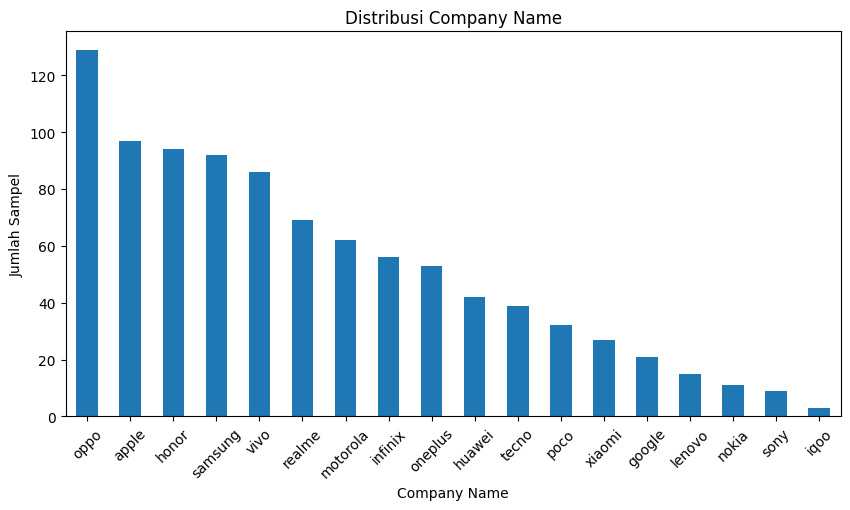


Distribusi data untuk Model Name:
                     jumlah sampel  persentase
Model Name                                   
Pad 128GB                       3         0.3
Pad 2 256GB                     3         0.3
Play 4 Pro                      2         0.2
K9 Pro 5G 128GB                 2         0.2
Pad 3 Pro 256GB                 2         0.2
...                           ...         ...
V25 Pro 256GB                   1         0.1
X90 Pro 256GB                   1         0.1
X90 Pro 512GB                   1         0.1
Y100 128GB                      1         0.1
Galaxy Z Fold6 1TB              1         0.1

[908 rows x 2 columns]


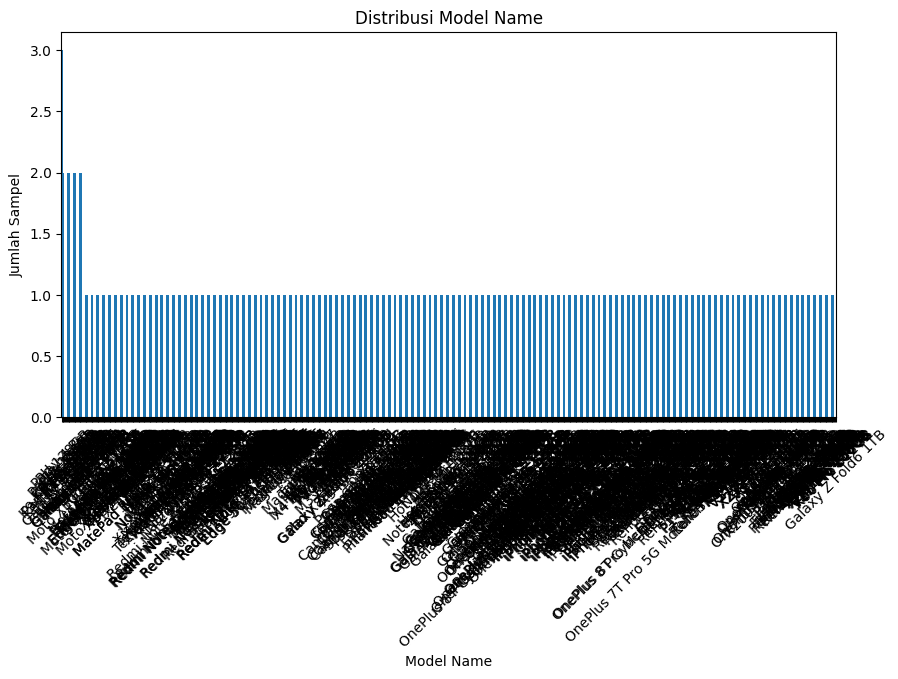


Distribusi data untuk Processor:
                      jumlah sampel  persentase
Processor                                     
Snapdragon 8 Gen 2              38         4.1
Snapdragon 695                  30         3.2
Snapdragon 8 Gen 3              27         2.9
Dimensity 810                   22         2.3
Snapdragon 8+ Gen 1             22         2.3
...                            ...         ...
Snapdragon 430                   1         0.1
Snapdragon 632                   1         0.1
Kirin 990E                       1         0.1
Kirin 9000                       1         0.1
Dimensity 8400                   1         0.1

[161 rows x 2 columns]


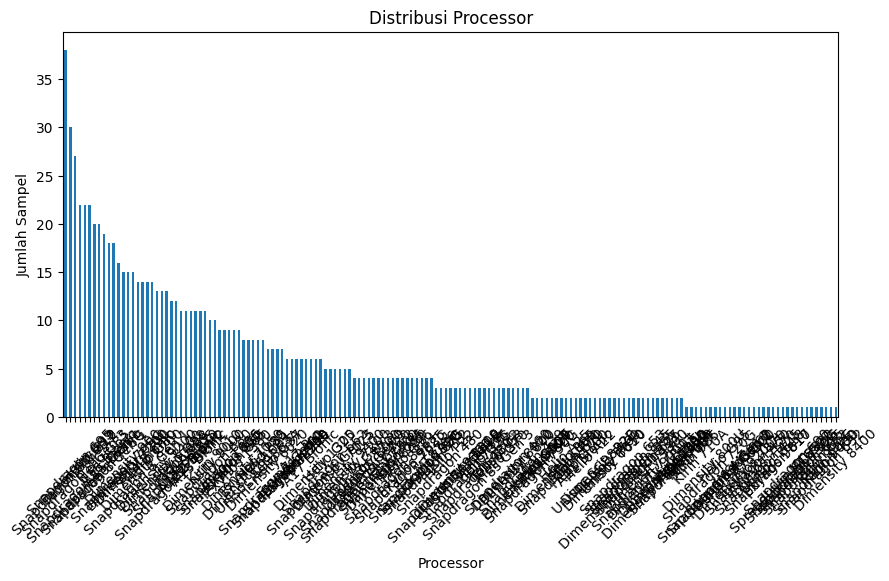

In [ ]:
for feature in categorical_features:
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)

    df_summary = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
    print(f"\nDistribusi data untuk {feature}:\n", df_summary)

    plt.figure(figsize=(10, 5))
    count.plot(kind='bar', title=f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Jumlah Sampel')
    plt.xticks(rotation=45)
    plt.show()

Dari visualisasi distribusi data fitur-fitur kategorikal di atas dapat disimpulkan bahwa:

* Fitur Company Name: Oppo merupakan merek dengan jumlah ponsel terbanyak (13.9%), diikuti oleh Apple (10.4%) dan Honor (9.8%). Merek seperti iQOO (0.3%) dan Sony (1.0%) memiliki jumlah sampel paling sedikit.
* Fitur Model Name: Dataset memiliki 908 model unik, dengan sebagian besar model hanya memiliki 1 atau 2 sampel. Hal ini menunjukkan bahwa dataset sangat bervariasi dalam hal model ponsel.
* Fitur Processor: Snapdragon 8 Gen 2 (3.2%) adalah prosesor yang paling umum digunakan, diikuti oleh MediaTek Dimensity 810 (2.4%) dan Helio G99 (2.3%). Namun, ada 217 jenis prosesor berbeda, dengan banyak prosesor hanya memiliki 1 sampel, menunjukkan variasi yang luas dalam jenis chipset yang digunakan.
* Distribusi Model & Processor: Banyak model dan prosesor memiliki jumlah sampel yang sangat sedikit, menunjukkan bahwa dataset mencakup berbagai varian ponsel dengan spesifikasi yang beragam.

### Numerical Features

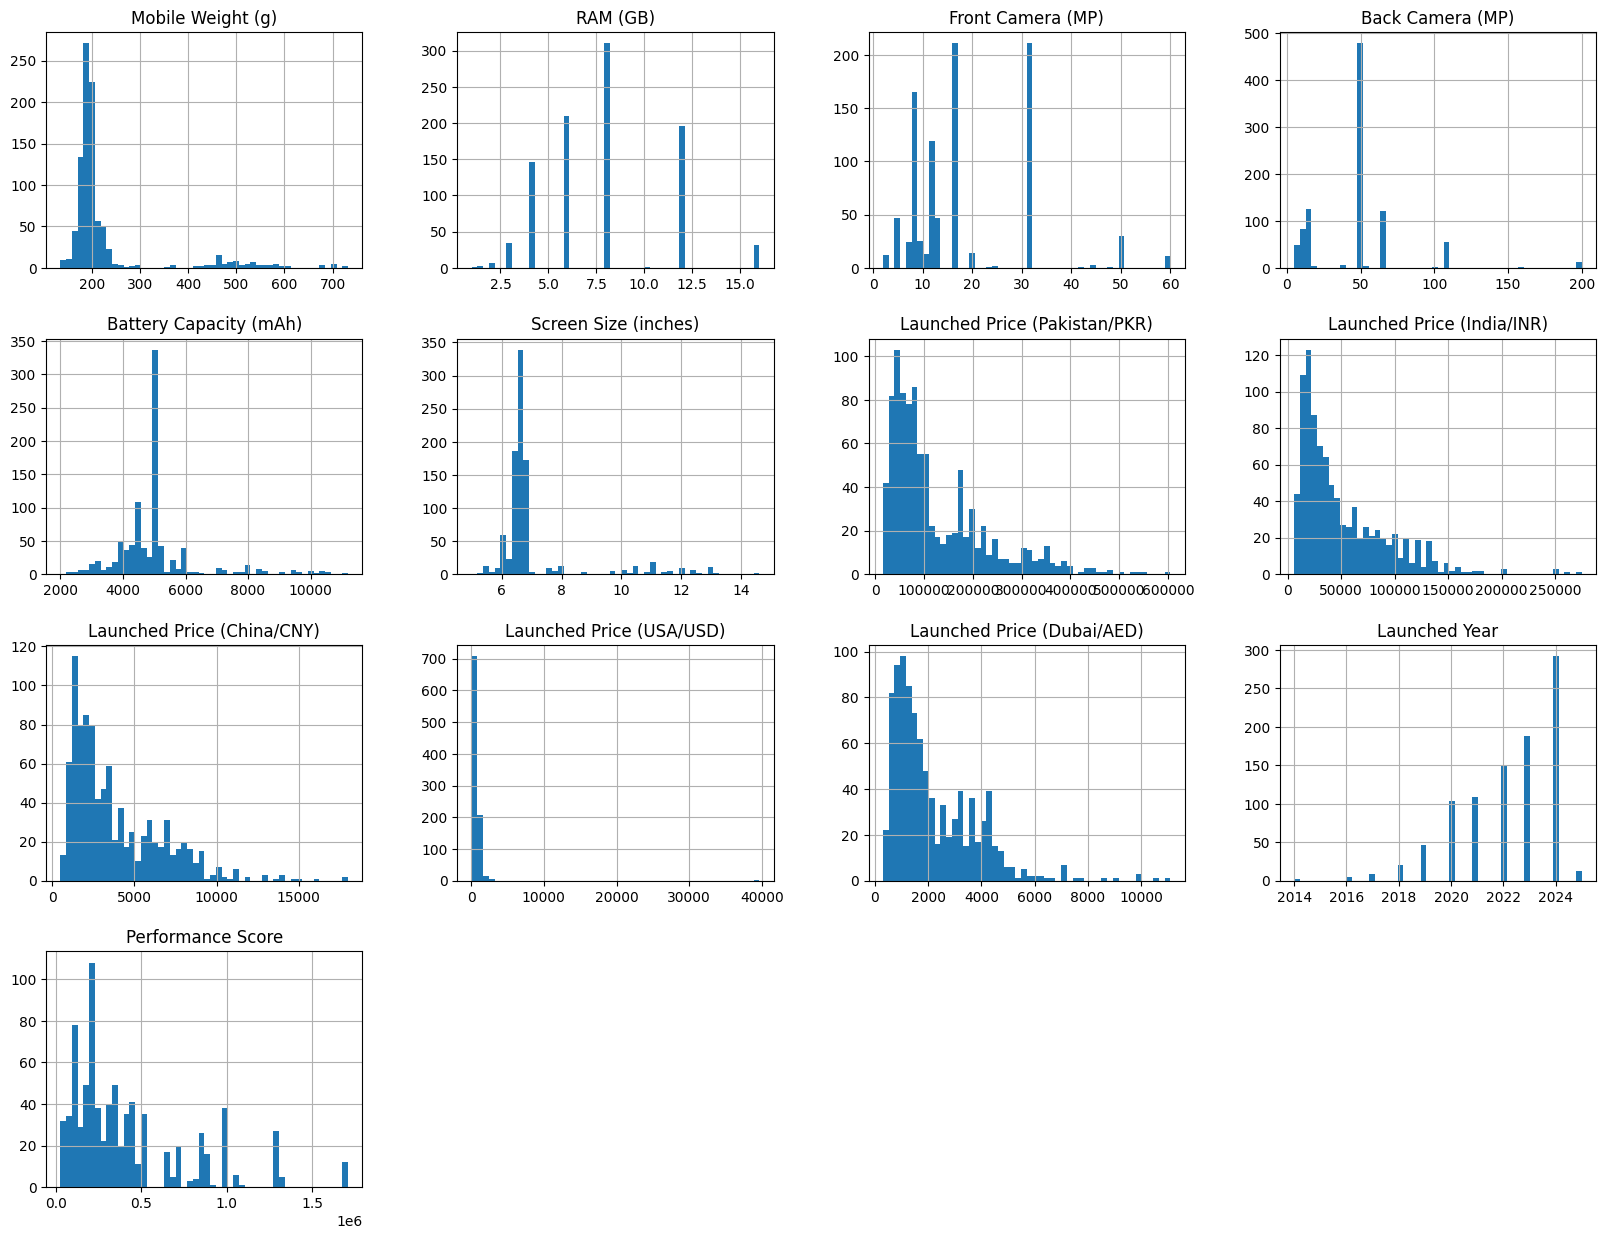

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Dari visualisasi distribusi data fitur-fitur numerik diatas dapat disimpulkan bahwa:
* Mobile Weight (g)
  * Sample terbanyak ada di value Mobile Weight sekitar 190g
  * Tidak ada pola khusus, tetapi sample terpusat di 190g, sisanya lebih dan kurang dari 190g.

* RAM (GB)
  * Sample terbanyak ada di value RAM 8 GB.
  * Ram dengan sample terbanyak selanjutnya adalah 4, 6, 12 GB.
  
* Front Camera (MP)
  * Sample terbanyak ada di value 8, 17, 32 MP.
  * Tidak ada pola khusus pada data.

* Back Camera (MP)
  * Sample terbanyak ada di value 50 MP.
  * Tidak ada pola khusus pada data.

* Batery Capacity (mAh)
  * Sample terbanyak ada di value 5000 mAh.
  * Lebih dari 50% sample memiliki value 5000 mAh dan dibawahnya.
  * Tidak ada pola khusus pada data.

* Screen Sizes (Inches)
  * Tidak ada pola khusus dalam distribusi.
  * Data terpusat di sekitar value 6.8 inches.

* Launched Price (Pakistan/PKR), Launched Price (India/INR), Launched Price (China/CNY), Launched Price (USA/USD), Launched Price (Dubai/AED)
  * Beberapa fitur diatas memiliki kesamaan pola dimana semakin tinggi harganya maka jumlah sample semakin sedikit.
  * Distribusi mileage miring ke kanan.

* Launched Year
  * Jumlah sample terbanyak ada di value 2024.
  * Distribusi mileage miring ke kiri.

* Performance Score
  * Tidak ada pola khusus yang terlihat
  * Lebih dari 50% sample memiliki skor kurang dari 0.5 x le6

## Multivariate Analysis

Langkah selanjutnya adalah melakukan Multivariate Analysis. Multivariate Analysis adalah teknik analisis statistik yang digunakan untuk memahami hubungan antara dua atau lebih variabel dalam suatu dataset. Tujuan utama analisis ini adalah untuk mengidentifikasi pola, hubungan, atau korelasi antara fitur, sehingga dapat membantu dalam pemodelan prediktif dan pengambilan keputusan. Fitur **Launched Price (China/CNY)** dipilih sebagai target analisis korelasi karena China adalah produsen terbesar smartphone terbesar didunia.

### Categorical Features

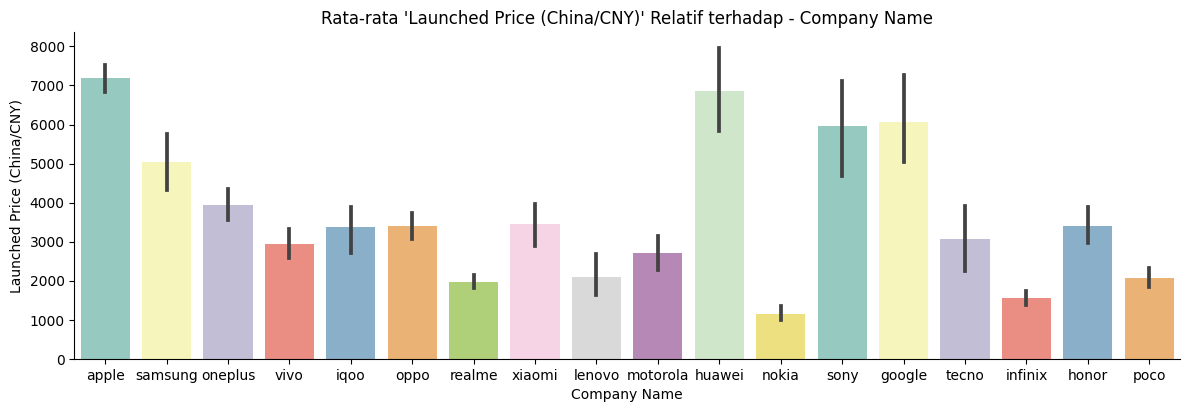

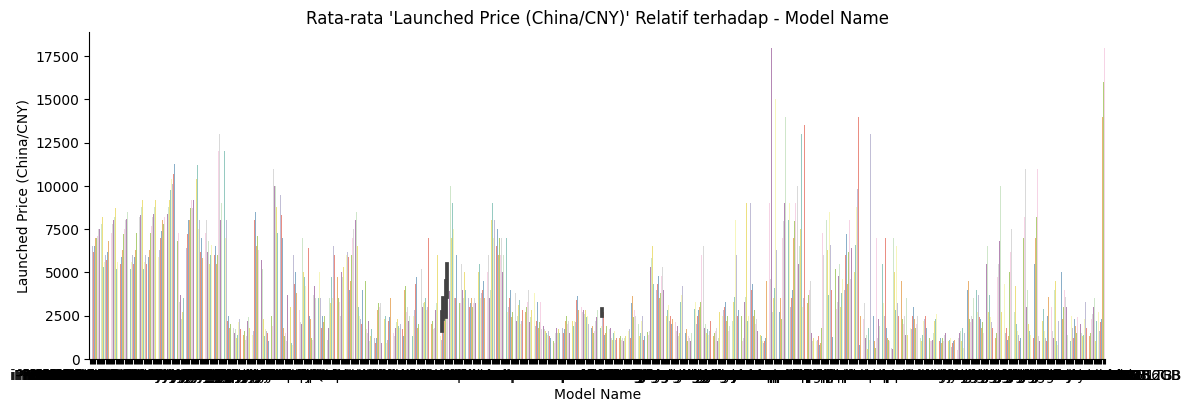

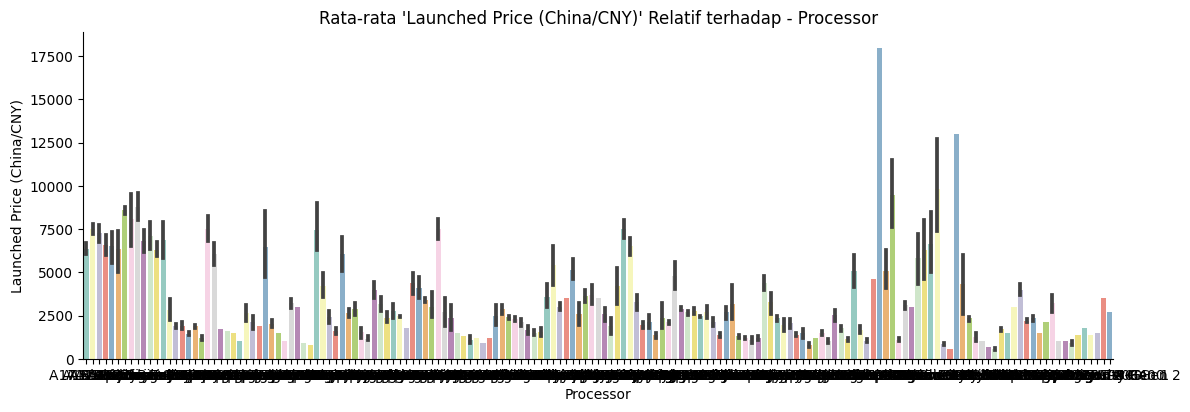

In [ ]:
cat_features = df.select_dtypes(include='object').columns.to_list()

# We use Launched Price (China/CNY) to see corelation between price and feature
for col in cat_features:
  sns.catplot(x=col, y="Launched Price (China/CNY)", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'Launched Price (China/CNY)' Relatif terhadap - {}".format(col))

Dari catplot visualisasi hubungan antara fitur price dengan fitur-fitur kategorikal diatas dapat disimpulkan bahwa:
* Pada fitur ‘Company Name’, ada perbedaan rata-rata harga. beberapa company name yaitu apple, huawei, sony, dan google memiliki rata-rata harga yang lebih tinggi daripada brand lainnya. Sehingga kemungkinan fitur company name memiliki pengaruh atau dampak yang cukup besar terhadap rata-rata harga.
* Pada fitur ‘Model’, ada banyak kategori dan tidak banyak perbedaan rata-rata harga. Hanya ada beberapa model yang memiliki perbedaan harga yang signifikan. Sehingga kemungkinan fitur brand memiliki pengaruh atau dampak yang cukup kecil terhadap rata-rata harga.
* Pada fitur ‘Processor’, ada banyak kategori dan tidak banyak perbedaan rata-rata harga. Hanya ada beberapa processor yang memiliki perbedaan harga yang signifikan. Sehingga kemungkinan fitur brand memiliki pengaruh atau dampak yang cukup kecil terhadap rata-rata harga.

### Numerical Features

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

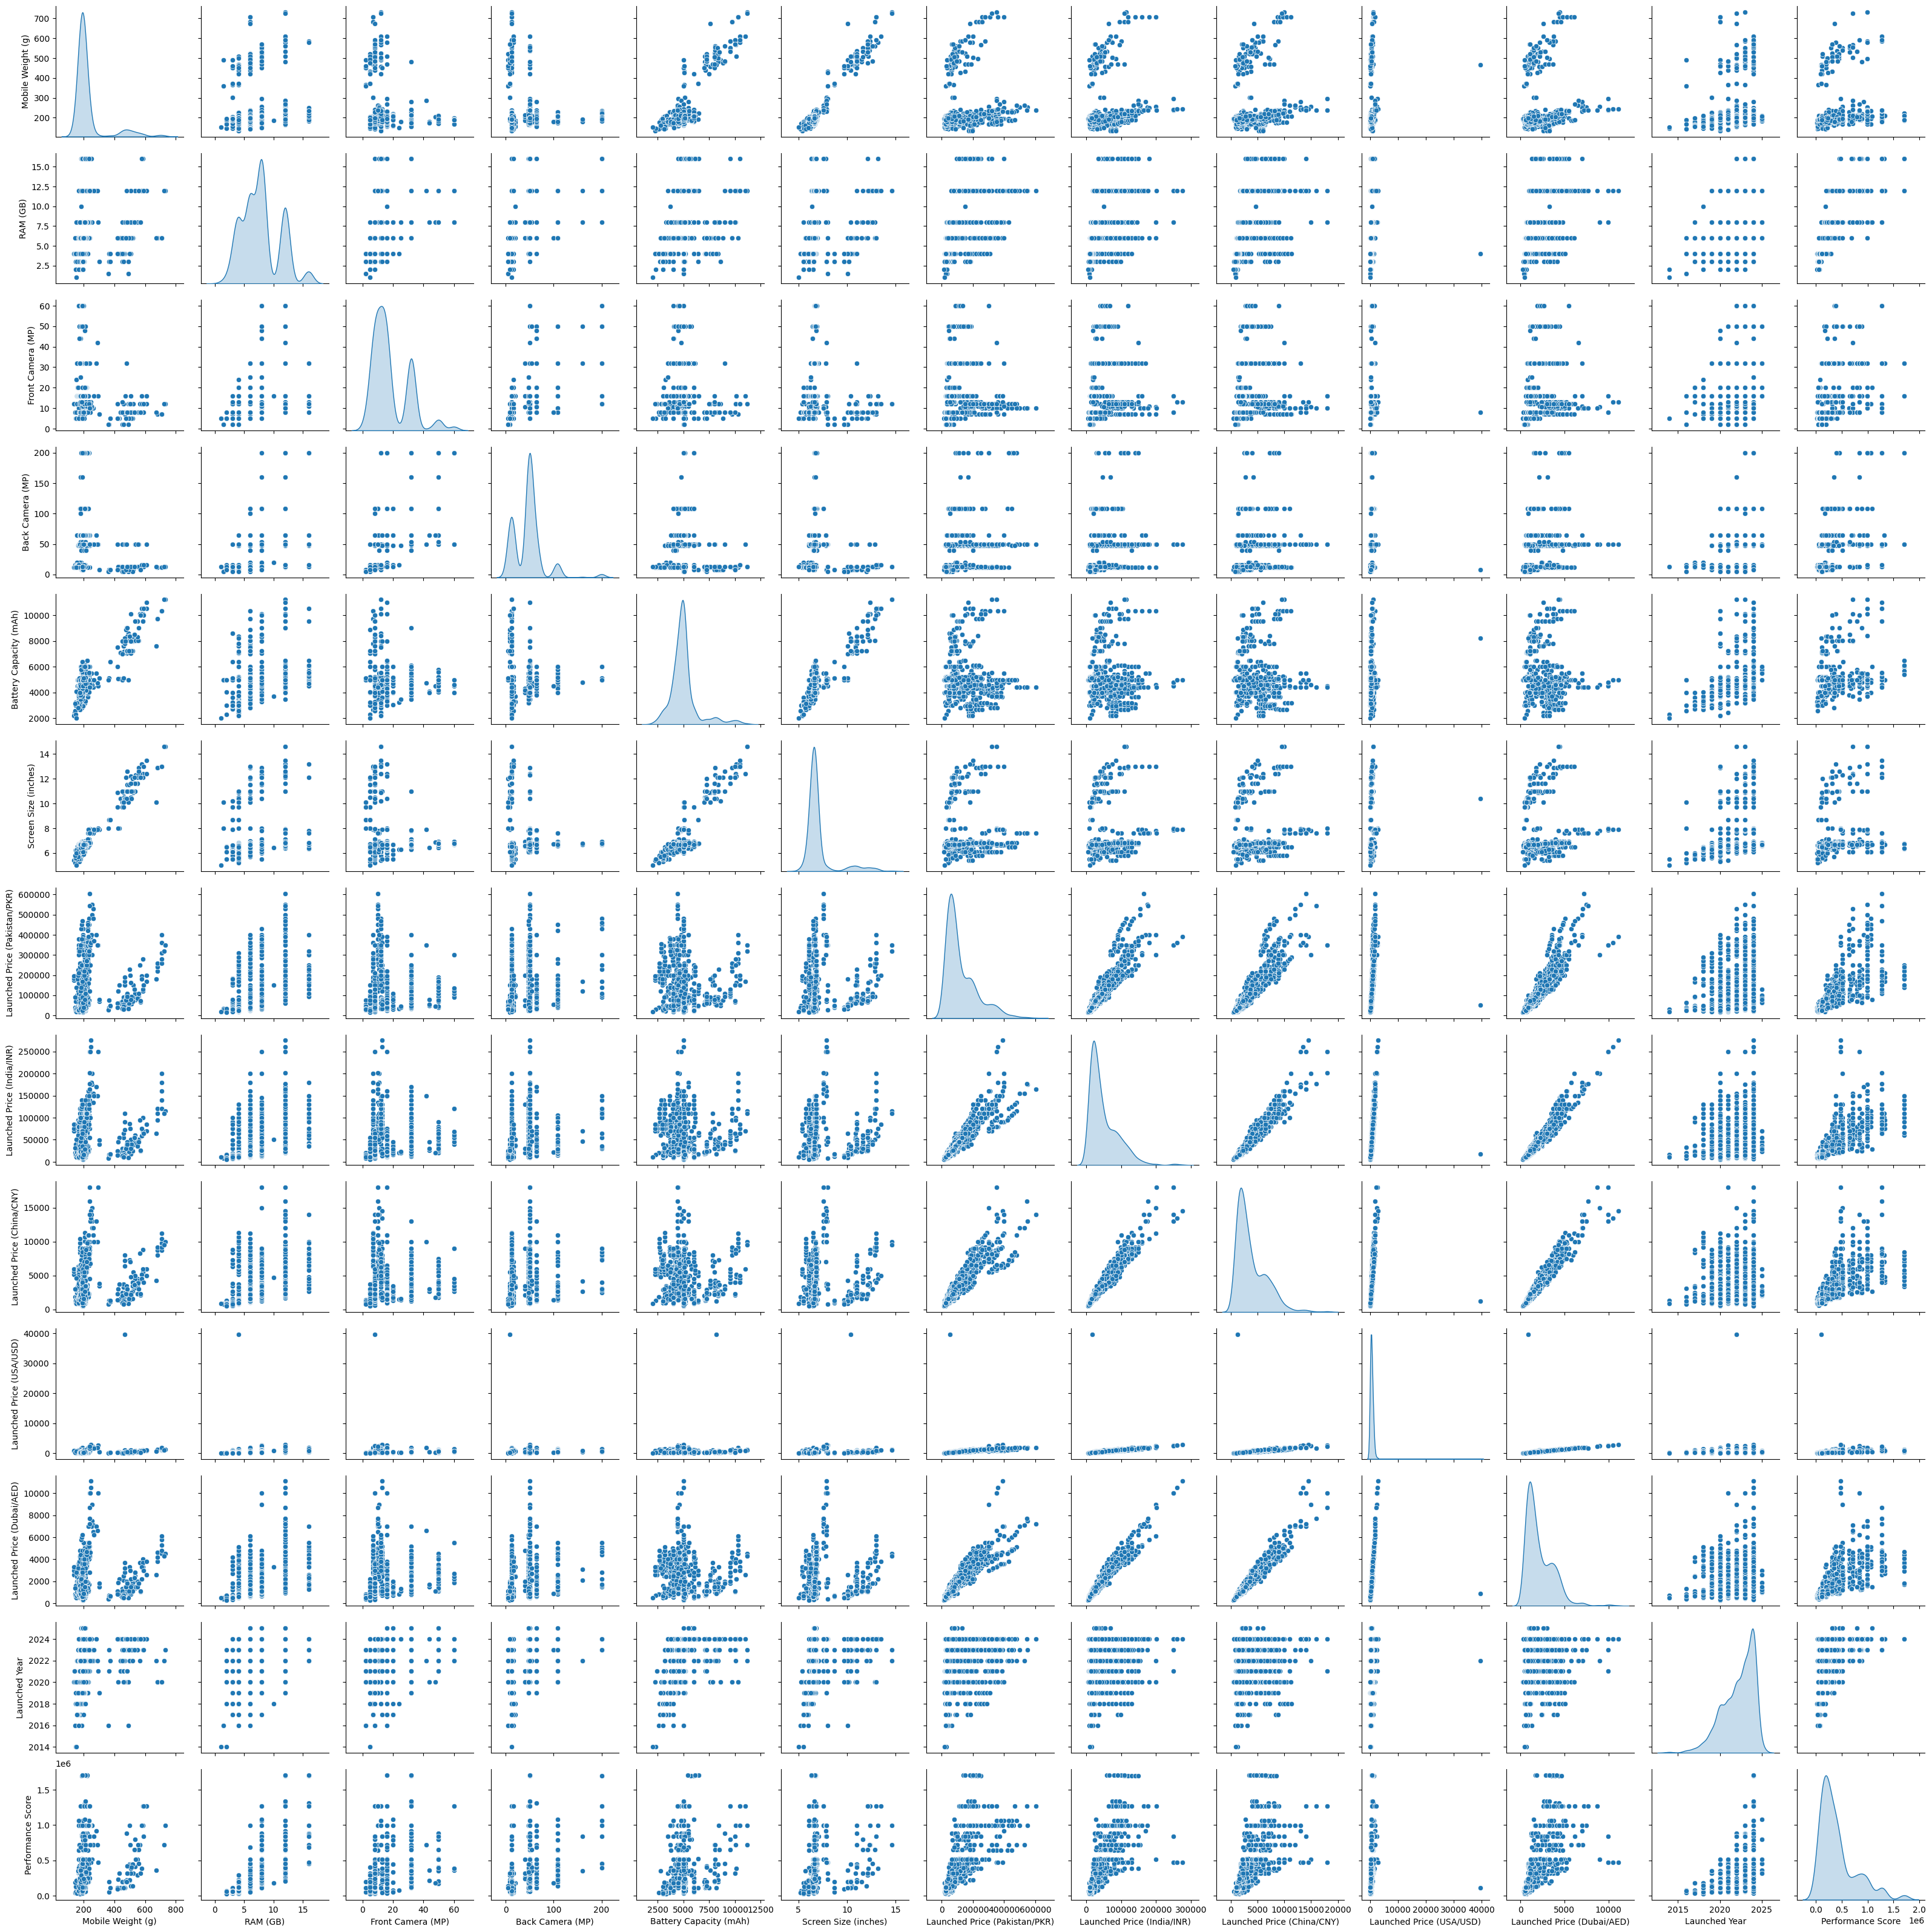

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

Dari grafik pairplot diatas, jika fokus pada sumbu "Launched Price (China/CNY)" dimana merupakan fitur target, dapat disimpulkan bahwa:

* Fitur mobile weight (g), Battery Capacity, dan Screen Size memiliki korelasi positif dengan fitur Launched Price (China/CNY) walaupun tidak terlalu terlihat.
* Fitur Performance Score memiliki korelasi positif dengan fitur Launched Price (China/CNY).
* Fitur RAM, Front Camera, Back Camera, dan Launched Year memiliki pola yang cukup acak dengan fitur Launched Price (China/CNY).
* Fitur yang tersisa, Launched Price (Pakistan/PKR), Launched Price (India/INR), Launched Price (USA/USD), dan Launched Price (Dubai/AED) tidak memiliki korelasi dengan fitur Launched Price (China/CNY) karena sebenarnya fitur-fitur tersebut sama-sama merepresentasikan harga, hanya dalam daerah atau mata uang yang berbeda.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

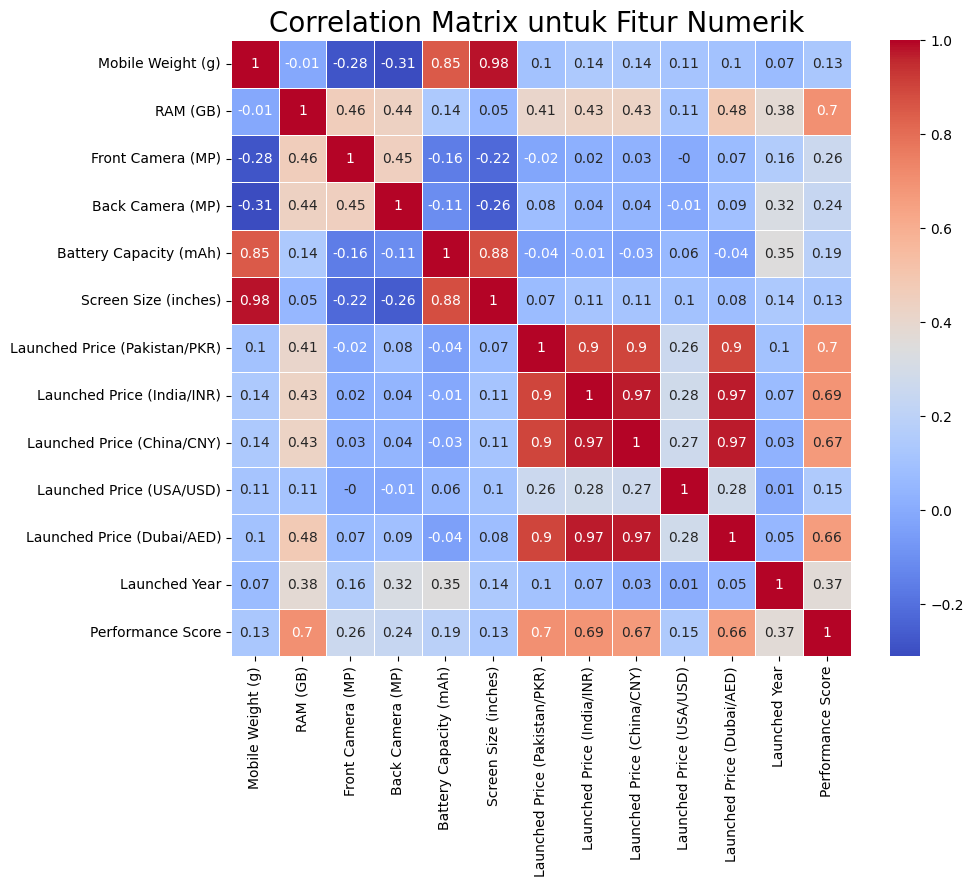

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Untuk lebih jelasnya, dapat diamati grafik korelasi diatas. Dapat disimpulkan bahwa:

* Hanya fitur RAM yang memiliki korelasi yang cukup kuat (0.43) dengan Launched Price (China/CNY), Kecuali fitur Launched Price negara lain.
* Fitur Mobile Weight memiliki korelasi yang sangat kuat (0.98) dengan Screen Size (Inches) dan korelasi kuat (0.85) dengan Battery Capacity.
* Fitur Battery Capacity memiliki korelasi yang kuat (0.88) dengan Screen Size (Inches).
* Fitur Performance score memiliki korelasi yang cukup kuat (0.67) dengan Launched Price (China/CNY) dan korelasi yang cukup kuat (0.7) dengan fitur RAM.

# **Data Preparation**

Setelah melakukan EDA dan sebelum membangun model machine learning, diperlukan tahapan data preparation untuk memastikan bahwa data memiliki kualitas yang baik dan dapat meningkatkan performa model. Tahapan ini mencakup pembersihan data, transformasi fitur, encoding variabel kategorikal, reduksi dimensi, serta standarisasi fitur.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company Name                   937 non-null    object 
 1   Model Name                     937 non-null    object 
 2   Mobile Weight (g)              937 non-null    float64
 3   RAM (GB)                       937 non-null    float64
 4   Front Camera (MP)              937 non-null    float64
 5   Back Camera (MP)               937 non-null    float64
 6   Processor                      937 non-null    object 
 7   Battery Capacity (mAh)         937 non-null    float64
 8   Screen Size (inches)           937 non-null    float64
 9   Launched Price (Pakistan/PKR)  936 non-null    float64
 10  Launched Price (India/INR)     937 non-null    float64
 11  Launched Price (China/CNY)     937 non-null    float64
 12  Launched Price (USA/USD)       937 non-null    flo

Diatas adalah struktur dataset yang masih seperti awal. memiliki 16 fitur.

In [ ]:
df.drop(columns=["Launched Price (Pakistan/PKR)", "Launched Price (India/INR)",
                 "Launched Price (USA/USD)", "Launched Price (Dubai/AED)",
                 "Processor"], inplace=True)
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Company Name,Model Name,Mobile Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Battery Capacity (mAh),Screen Size (inches),Launched Price (China/CNY),Launched Year,Performance Score
0,apple,iPhone 16 128GB,174.0,6.0,12.0,48.0,3600.0,6.1,5799.0,2024,NaN
1,apple,iPhone 16 256GB,174.0,6.0,12.0,48.0,3600.0,6.1,6099.0,2024,NaN
2,apple,iPhone 16 512GB,174.0,6.0,12.0,48.0,3600.0,6.1,6499.0,2024,NaN
3,apple,iPhone 16 Plus 128GB,203.0,6.0,12.0,48.0,4200.0,6.7,6199.0,2024,NaN
4,apple,iPhone 16 Plus 256GB,203.0,6.0,12.0,48.0,4200.0,6.7,6499.0,2024,NaN


Lalu dilakukan proses data preparation yang pertama, yaitu menghapus fitur yang dianggap tidak diperlukan dalam membuat sistem rekomendasi.

* Fitur "Launched Price (Pakistan/PKR)", "Launched Price (India/INR)", "Launched Price (USA/USD)", dan "Launched Price (Dubai/AED)" dihapus karena sudah ada fitur Launched Price (China/CNY) yang merepresentasikan harga berdasarkan negara atau mata uang China/CNY.
* Fitur Processor sudah tidak diperlukan karena sudah ada fitur Performance Score yang merepresentasikan kemampuan processor smartphone.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company Name                937 non-null    object 
 1   Model Name                  937 non-null    object 
 2   Mobile Weight (g)           937 non-null    float64
 3   RAM (GB)                    937 non-null    float64
 4   Front Camera (MP)           937 non-null    float64
 5   Back Camera (MP)            937 non-null    float64
 6   Battery Capacity (mAh)      937 non-null    float64
 7   Screen Size (inches)        937 non-null    float64
 8   Launched Price (China/CNY)  937 non-null    float64
 9   Launched Year               937 non-null    int64  
 10  Performance Score           802 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 80.6+ KB


Setelah dilakukan penghapusan, diatas adalah struktur dataset yang baru dengan kolom "Launched Price (Pakistan/PKR)", "Launched Price (India/INR)", "Launched Price (USA/USD)", "Launched Price (Dubai/AED)", dan "Processor" yang sudah tidak ada.

In [ ]:
# Check Missing Values
df.isnull().sum()

Company Name                    0
Model Name                      0
Mobile Weight (g)               0
RAM (GB)                        0
Front Camera (MP)               0
Back Camera (MP)                0
Battery Capacity (mAh)          0
Screen Size (inches)            0
Launched Price (China/CNY)      0
Launched Year                   0
Performance Score             135
dtype: int64

Kode diatas berfungsi untuk melihat apakah ada missing values pada dataset. Setelah dijalankan, ternyata pada kolom performance score terdapat 135. Hal ini mungkin dikarenakan kurang lengkapnya dataset kedua yang sebelumnya digabungkan, sehingga ada data yang kosong.

In [ ]:
# Count missing values in "Performance Score" column by Company Name
missing_values_performance = df.groupby("Company Name")["Performance Score"].apply(lambda x: x.isnull().sum())

print(missing_values_performance)

Company Name
apple       97
google      13
honor        6
huawei       0
infinix      4
iqoo         0
lenovo       0
motorola     2
nokia        0
oneplus      0
oppo         4
poco         1
realme       0
samsung      2
sony         0
tecno        2
vivo         4
xiaomi       0
Name: Performance Score, dtype: int64


Dari kode diatas, ternyata sebagian besar missing values ada di device Apple. Hal ini mungkin dikarenakan dataset 2 yang telah diganbungkan hanya memiliki data benchmark performance untuk processor/SoC Android.

## Menangani Missing Values & Outliers

Langkah kedua dalam data preparation adalah menangani Missing Values & Outliers.

* Dari kode sebelumnya, terdapat banyak missing values di device Apple sehingga diputuskan untuk menghapus data dengan missing values dan tidak dilakukan imputasi demi menjaga relevansi dan validitas data kolom Performance Score karena sangat penting.
* Metode yang digunakan untuk menangani outliers adalah **Box-Cox Transformation**.

Box-Cox Transformation adalah teknik yang digunakan untuk menormalkan distribusi data dan mengurangi pengaruh outliers dengan menerapkan transformasi non-linear pada fitur numerik yang hanya memiliki nilai positif.

Alasan Pemilihan Box-Cox:
* Mengatasi Outliers Tanpa Menghapus Data → Tidak ada informasi yang hilang, hanya ditransformasikan.
* Membantu Menormalkan Data → Berguna untuk model berbasis regresi dan metode yang mengasumsikan distribusi normal.
* Lebih Efektif Dibanding Log Transformation → Sebelumnya telah dicoba metode Log Transformation dan ternyata Box-Cox lebih baik karena secara dinamis menyesuaikan transformasi berdasarkan distribusi data.

In [ ]:
# Delete row with missing values
df = df.dropna(subset=["Performance Score"])

# Check Missing Values
df.isnull().sum()

# Save Original Dataset before transformation
df_original = df.copy()

Setelah dilakukan penghapusan, sudah tidak ada lagi missing values pada dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 97 to 936
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company Name                802 non-null    object 
 1   Model Name                  802 non-null    object 
 2   Mobile Weight (g)           802 non-null    float64
 3   RAM (GB)                    802 non-null    float64
 4   Front Camera (MP)           802 non-null    float64
 5   Back Camera (MP)            802 non-null    float64
 6   Battery Capacity (mAh)      802 non-null    float64
 7   Screen Size (inches)        802 non-null    float64
 8   Launched Price (China/CNY)  802 non-null    float64
 9   Launched Year               802 non-null    int64  
 10  Performance Score           802 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 75.2+ KB


Dataset yang tersisa berjumlah 802 data

In [ ]:
df.describe()

,Mobile Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Battery Capacity (mAh),Screen Size (inches),Launched Price (China/CNY),Launched Year,Performance Score
count,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,8.020000e+02
mean,223.397007,8.143392,19.317207,50.341147,5105.567332,7.066334,3416.890274,2022.360349,4.184158e+05
std,96.821472,3.150909,12.266602,31.092616,1213.373315,1.432543,2548.550422,1.729836,3.528397e+05
min,143.000000,2.000000,2.000000,5.000000,2600.000000,5.200000,599.000000,2016.000000,2.567300e+04
25%,185.000000,6.000000,8.000000,48.000000,4500.000000,6.502500,1699.000000,2021.000000,1.812620e+05
50%,193.000000,8.000000,16.000000,50.000000,5000.000000,6.670000,2499.000000,2023.000000,3.145010e+05
75%,205.750000,12.000000,32.000000,50.000000,5100.000000,6.780000,4299.000000,2024.000000,5.132840e+05
max,732.000000,16.000000,60.000000,200.000000,11200.000000,14.600000,17999.000000,2025.000000,1.709461e+06


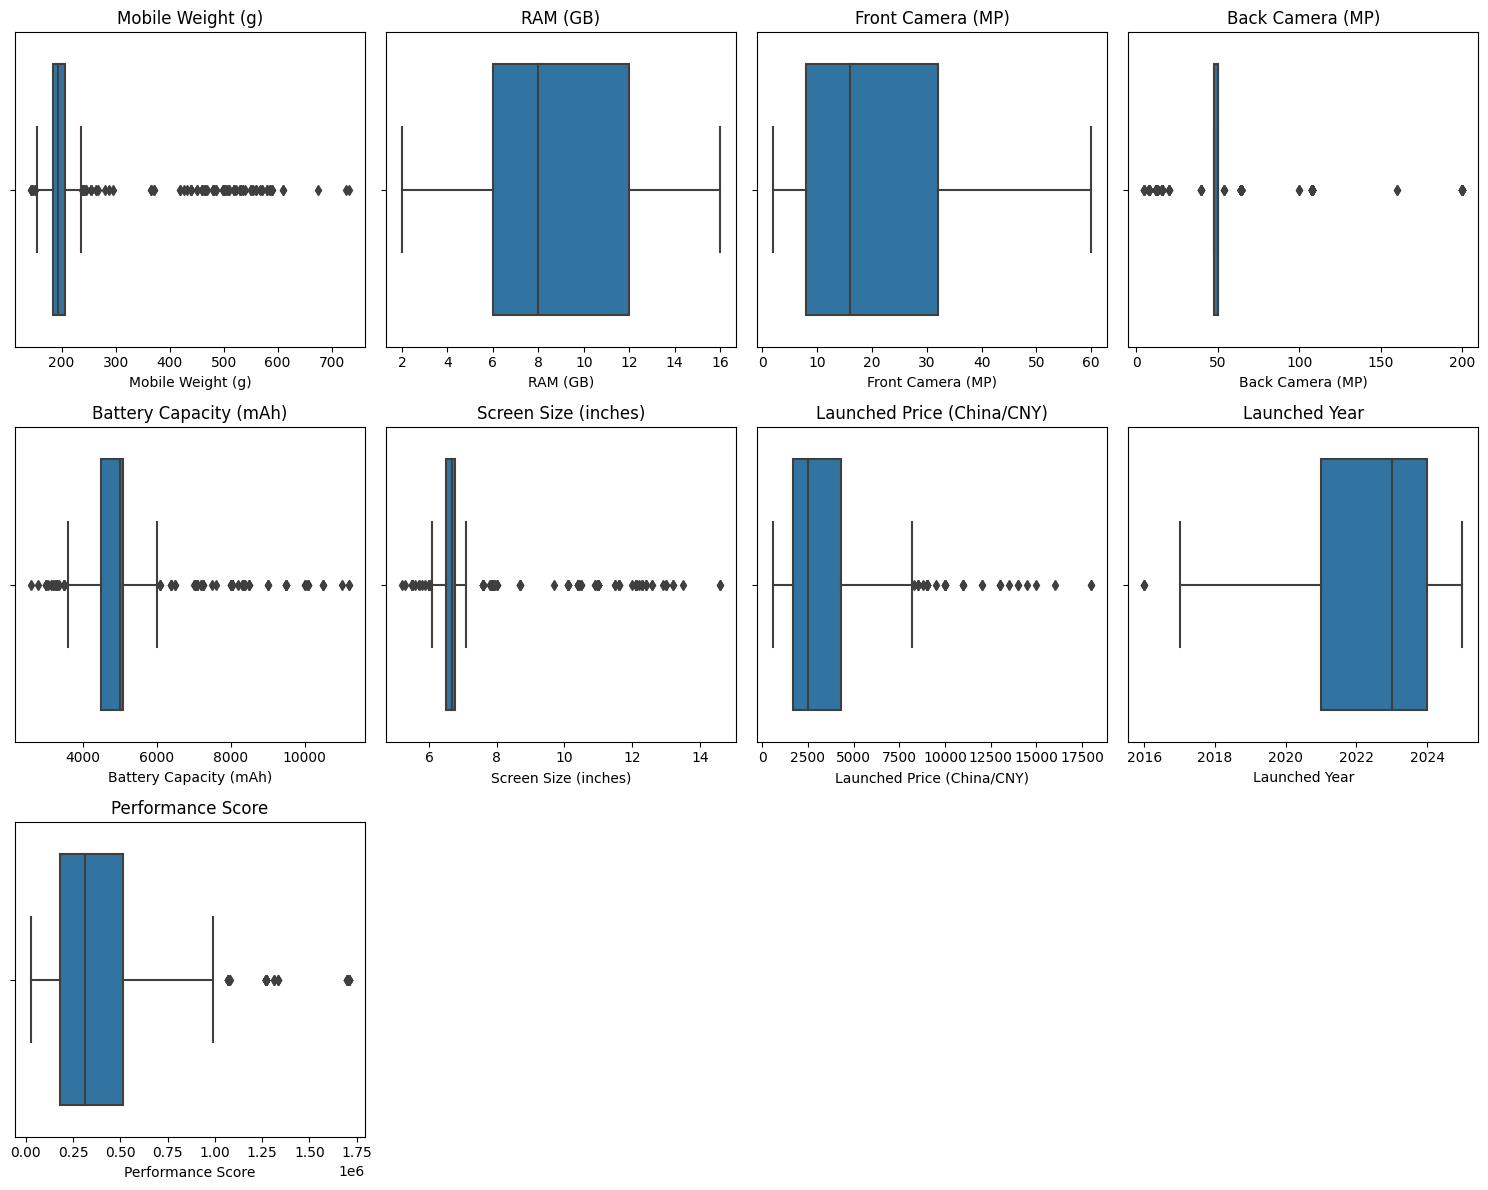

In [ ]:
# Box-Plot to visualize outliers
num_features = df.select_dtypes(include=['number']).columns
num_plots = len(num_features)
rows = (num_plots // 4) + (num_plots % 4 > 0)
fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Titik-titik diluar adalah outlier yang perlu diatasi.

In [ ]:
from scipy.stats import boxcox

# Copy dataframe to avoid SettingWithCopyWarning
df = df.copy()

numerical_features = [
    "Mobile Weight (g)", "Back Camera (MP)",
    "Battery Capacity (mAh)", "Screen Size (inches)",
    "Launched Price (China/CNY)", "Performance Score"
]

boxcox_lambdas = {}

# Box-Cox
for feature in numerical_features:
    df.loc[:, feature], boxcox_lambdas[feature] = boxcox(df[feature])

print("Data transformation complete!")

Data transformation complete!


Kode diatas adalah kode untuk metode Box-Cox. Untuk mengatasi outliers tanpa mengubah nilai asli atau menghapus data. Informasi akan dipertahankan.

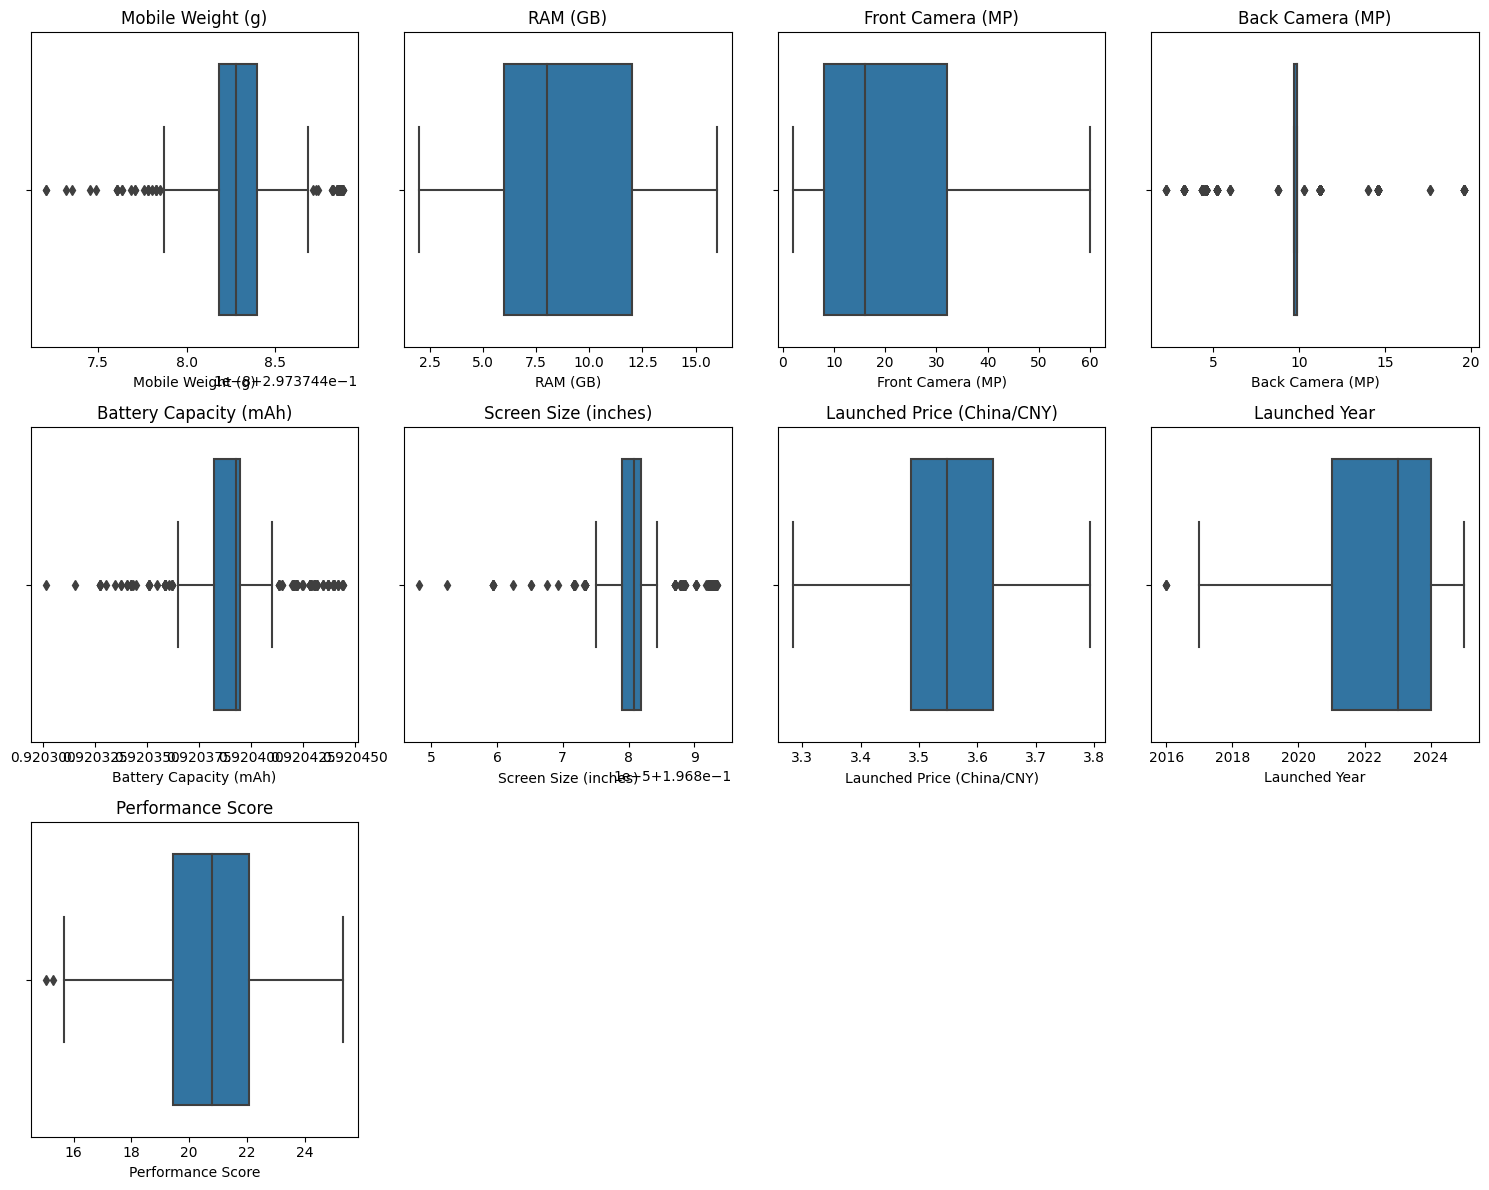

In [ ]:
# Box-Plot to visualize outliers
num_features = df.select_dtypes(include=['number']).columns
num_plots = len(num_features)
rows = (num_plots // 4) + (num_plots % 4 > 0)
fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Setelah dilakukan metode Box-Cox untuk mengatasi, terlihat persebaran data menjadi lebih baik meskipun beberapa fitur masih memiliki outlier.

## Encoding for Categorical Feature

Langkah ketiga adalah encoding untuk fitur kategorikal.

Teknik yang digunakan:
* Target Encoding untuk fitur Company Name
* Label Encoding untuk fitur Model Name

Pada tahap ini, dilakukan encoding untuk fitur kategorikal agar dapat digunakan dalam model machine learning. Teknik yang digunakan adalah Target Encoding untuk fitur Company Name dan Label Encoding untuk fitur Model Name.

* Encoding untuk fitur Company Name
    * Company Name dikonversi ke nilai numerik berdasarkan rata-rata Performance Score dari setiap perusahaan.
    * Teknik ini membantu mempertahankan hubungan antara kategori dengan target tanpa meningkatkan dimensi dataset.
* Encoding untuk fitur Model Name
    * Model Name dikonversi ke nilai numerik menggunakan Label Encoding, di mana setiap model diberikan nilai unik berdasarkan indeksnya.
    * Metode ini digunakan karena jumlah kategori pada Model Name sangat banyak, sehingga One-Hot Encoding tidak efisien dan menyebabkan peningkatan dimensi dataset (curse of dimensionality).
* Alasan Pemilihan Teknik Encoding
    * Target Encoding cocok untuk Company Name, karena dapat menangkap hubungan antara brand dan performa perangkat.
    * Label Encoding cocok untuk Model Name, karena lebih efisien dalam menyimpan informasi tanpa meningkatkan dimensi dataset secara signifikan.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Using Target Encoding for Company Name
company_target_mean = df.groupby("Company Name")["Performance Score"].mean()
df["Company Name Encoded"] = df["Company Name"].map(company_target_mean)

# Mapping for decoding
company_mapping = company_target_mean.to_dict()
reverse_company_mapping = {v: k for k, v in company_mapping.items()}

# Label Encoding for Model Name
label_encoder = LabelEncoder()
df["Model Name Encoded"] = label_encoder.fit_transform(df["Model Name"])

# Mapping for decoding
model_mapping = dict(zip(df["Model Name"], df["Model Name Encoded"]))
reverse_model_mapping = {v: k for k, v in model_mapping.items()}

# Remove original categorical columns
df.drop(columns=["Company Name", "Model Name"], inplace=True)

df.head()

,Mobile Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Battery Capacity (mAh),Screen Size (inches),Launched Price (China/CNY),Launched Year,Performance Score,Company Name Encoded,Model Name Encoded
97,0.297374,12.0,12.0,19.567230,0.920393,0.196882,3.698440,2024,24.015501,20.886173,210
98,0.297374,12.0,12.0,19.567230,0.920393,0.196882,3.706096,2024,24.015501,20.886173,211
99,0.297374,8.0,12.0,9.899051,0.920389,0.196880,3.675158,2024,24.015501,20.886173,212
100,0.297374,8.0,12.0,9.899051,0.920389,0.196880,3.690123,2024,24.015501,20.886173,213
101,0.297374,8.0,12.0,9.899051,0.920368,0.196873,3.666749,2024,24.015501,20.886173,208


In [ ]:
df.describe()

,Mobile Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Battery Capacity (mAh),Screen Size (inches),Launched Price (China/CNY),Launched Year,Performance Score,Company Name Encoded,Model Name Encoded
count,8.020000e+02,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.00000
mean,2.973745e-01,8.143392,19.317207,9.377067,0.920390,0.196881,3.554947,2022.360349,20.730069,20.730069,383.65586
std,2.598143e-09,3.150909,12.266602,3.131161,0.000018,0.000005,0.097158,1.729836,2.133198,0.840311,221.88079
min,2.973745e-01,2.000000,2.000000,2.297163,0.920301,0.196848,3.284124,2016.000000,15.036898,17.664862,0.00000
25%,2.973745e-01,6.000000,8.000000,9.690816,0.920382,0.196879,3.485546,2021.000000,19.439595,20.011000,193.25000
50%,2.973745e-01,8.000000,16.000000,9.899051,0.920393,0.196881,3.548299,2023.000000,20.798487,20.886173,380.50000
75%,2.973745e-01,12.000000,32.000000,9.899051,0.920395,0.196882,3.627325,2024.000000,22.053136,21.134807,572.75000
max,2.973745e-01,16.000000,60.000000,19.567230,0.920444,0.196893,3.792913,2025.000000,25.331667,22.642946,773.00000


## Standarization

Langkah keenam dan terakhir adalah melakukan Standarisasi. Standarisasi adalah proses transformasi data numerik agar memiliki skala yang seragam, biasanya dengan mean (rata-rata) = 0 dan standar deviasi = 1. Tujuannya adalah untuk memastikan bahwa setiap fitur memiliki kontribusi yang seimbang dalam model machine learning, terutama jika fitur memiliki skala atau unit yang berbeda. Teknik yang digunakan adalah Standar Scaler.

Alasan:

* Menghindari skala yang terlalu besar pada fitur tertentu, yang dapat memengaruhi performa model.

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = [
    "Mobile Weight (g)", "RAM (GB)", "Front Camera (MP)", "Back Camera (MP)",
    "Battery Capacity (mAh)", "Screen Size (inches)",
    "Launched Price (China/CNY)", "Performance Score", "Launched Year"
]

scaler = StandardScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()

,Mobile Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Battery Capacity (mAh),Screen Size (inches),Launched Price (China/CNY),Launched Year,Performance Score,Company Name Encoded,Model Name Encoded
97,1.026831,1.224731,-0.596887,3.256466,0.119790,0.165933,1.477815,0.948456,1.541105,20.886173,210
98,1.026831,1.224731,-0.596887,3.256466,0.119790,0.165933,1.556672,0.948456,1.541105,20.886173,211
99,0.020407,-0.045536,-0.596887,0.166810,-0.098563,-0.215153,1.238043,0.948456,1.541105,20.886173,212
100,0.020407,-0.045536,-0.596887,0.166810,-0.098563,-0.215153,1.392165,0.948456,1.541105,20.886173,213
101,-1.502431,-0.045536,-0.596887,0.166810,-1.201167,-1.547882,1.151432,0.948456,1.541105,20.886173,208


In [ ]:
df.describe().round(4)

,Mobile Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Battery Capacity (mAh),Screen Size (inches),Launched Price (China/CNY),Launched Year,Performance Score,Company Name Encoded,Model Name Encoded
count,802.0000,802.0000,802.0000,802.0000,802.0000,802.0000,802.0000,802.0000,802.0000,802.0000,802.0000
mean,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,20.7301,383.6559
std,1.0006,1.0006,1.0006,1.0006,1.0006,1.0006,1.0006,1.0006,1.0006,0.8403,221.8808
min,-4.2096,-1.9509,-1.4126,-2.2625,-4.8632,-6.5981,-2.7892,-3.6791,-2.6705,17.6649,0.0000
25%,-0.4602,-0.6807,-0.9232,0.1003,-0.4642,-0.4279,-0.7148,-0.7869,-0.6053,20.0110,193.2500
50%,-0.0989,-0.0455,-0.2706,0.1668,0.1198,-0.0738,-0.0685,0.3700,0.0321,20.8862,380.5000
75%,0.3580,1.2247,1.0346,0.1668,0.2223,0.1308,0.7454,0.9485,0.6206,21.1348,572.7500
max,2.2355,2.4950,3.3186,3.2565,2.9300,2.4456,2.4508,1.5269,2.1585,22.6429,773.0000


Setelah dilakukan standarisasi, dapat dilihat pada semua fitur numerik nilai mean (rata-rata) menjadi 0 dan standar deviasi (std) menjadi 1.

# Modelling

Setelah melakukan Data Preparation, selanjutnya adalah melakukan modelling machine learning. Modelling dalam sistem rekomendasi adalah proses membangun metode yang dapat memberikan rekomendasi berdasarkan preferensi dan kebutuhan pengguna. Dalam kasus ini, sistem rekomendasi yang dibuat menggunakan pendekatan **Content-Based Filtering**. Hal ini dikarenakan dataset yang digunakan hanya berisi fitur-fitur mengenai content/item yang berupa spesifikasi smartphone. Model atau algoritma yang digunakan adalah **Weighted Sum Model (WSM)** dan **Learning to Rank (LTR)**.

In [ ]:
weight_preferences = {
    "gaming": {
        "Performance Score": 0.6,
        "RAM (GB)": 0.2,
        "Battery Capacity (mAh)": 0.12,
        "Launched Year": 0.08,
        "Screen Size (inches)": 0.005,
        "Back Camera (MP)": 0.002,
        "Front Camera (MP)": 0.001,
        "Mobile Weight (g)": 0.002
    },
    "photography": {
        "Back Camera (MP)": 0.35,
        "Front Camera (MP)": 0.35,
        "RAM (GB)": 0.08,
        "Performance Score": 0.08,
        "Launched Year": 0.10,
        "Screen Size (inches)": 0.03,
        "Battery Capacity (mAh)": 0.02,
        "Mobile Weight (g)": 0.01
    },
    "normal usage": {
        "Battery Capacity (mAh)": 0.30,
        "Performance Score": 0.28,
        "RAM (GB)": 0.15,
        "Mobile Weight (g)": 0.10,
        "Launched Year": 0.12,
        "Screen Size (inches)": 0.03,
        "Back Camera (MP)": 0.015,
        "Front Camera (MP)": 0.005
    }
}

Diatas adalah variabel yang menentukan pembobotan tiap fitur yang akan digunakan di kedua model yang akan dibuat.

## Model 1: Weighted Sum Model (WSM)
Weighted Sum Model (WSM) adalah metode berbasis skoring yang digunakan untuk mengurutkan dan memilih alternatif terbaik berdasarkan bobot preferensi pengguna. Dalam sistem rekomendasi smartphone, WSM digunakan untuk menghitung skor total setiap smartphone dengan menjumlahkan nilai fitur yang telah dinormalisasi, dikalikan dengan bobot yang telah ditentukan untuk setiap preferensi pengguna.

Dalam penerapan WSM pada sistem rekomendasi smartphone, setiap smartphone diberi Ranking Score berdasarkan bobot fitur yang sesuai dengan preferensi pengguna, misalnya Gaming lebih menitikberatkan pada Performance Score, RAM, dan Baterai, sedangkan Photography lebih fokus pada kamera. Skor dihitung dengan menjumlahkan hasil perkalian bobot preferensi dengan nilai fitur masing-masing smartphone. Setelah skor dihitung, smartphone diurutkan berdasarkan Ranking Score tertinggi untuk menghasilkan daftar rekomendasi terbaik tanpa perlu melibatkan model pembelajaran mesin.

In [ ]:
import numpy as np

def calculate_wsm(df_standardized, preference, max_price):
    """
    Menghitung skor rekomendasi berdasarkan metode Weighted Sum Model (WSM) dengan filter harga maksimal.

    Parameters:
    df_standardized (DataFrame): Data smartphone yang telah melalui proses standardisasi menggunakan StandardScaler.
                                 Semua fitur numerik telah dinormalisasi agar memiliki skala yang sebanding.

    preference (str): Preferensi pengguna yang menentukan bobot fitur yang digunakan dalam perhitungan skor WSM.
                      Pilihan yang tersedia:
                      - "gaming": Prioritas pada performa, baterai, dan RAM.
                      - "photography": Prioritas pada kamera belakang, kamera depan, dan ukuran layar.
                      - "normal usage": Prioritas pada kenyamanan penggunaan sehari-hari seperti bobot ringan, daya tahan baterai, dan performa seimbang.

    max_price (float): Batas maksimal harga smartphone yang dipilih oleh pengguna.

    Returns:
    DataFrame: Data smartphone yang telah dihitung skor WSM-nya, difilter berdasarkan harga,
               dan diurutkan dari skor tertinggi ke terendah.
    """

    if preference not in weight_preferences:
        raise ValueError("Preferensi tidak valid. Pilih dari: 'gaming', 'photography', atau 'normal usage'.")

    # Sort By Price
    df_filtered = df_standardized[df_standardized["Launched Price (China/CNY)"] <= max_price].copy()

    if df_filtered.empty:
        return "Tidak ada smartphone yang sesuai dengan preferensi dan batas harga yang diberikan."

    # Get Weight Preferences
    weights = weight_preferences[preference]

    # Inverse Mobile Weight (g) karena semakin ringan semakin baik
    df_filtered["Mobile Weight (g)"] = 1 / (df_filtered["Mobile Weight (g)"] + 1e-9)

    # Count WSM Score
    df_filtered["WSM Score"] = np.dot(df_filtered[list(weights.keys())], list(weights.values()))

    # Sort by highest score
    df_filtered = df_filtered.sort_values(by="WSM Score", ascending=False)

    return df_filtered

Diatas adalah Model untuk menghitung WSM Score berdasarkan preferensi smartphone dan harga maksimal dari pengguna.

## Model 2: Learning to Rank (LTR)
Learning to Rank (LTR) adalah teknik dalam Machine Learning yang digunakan untuk mengurutkan item berdasarkan relevansi terhadap kueri atau preferensi tertentu. LTR biasanya digunakan dalam sistem rekomendasi, pencarian informasi (IR), dan ranking hasil pencarian. Dalam sistem rekomendasi smartphone, LTR digunakan untuk mengurutkan smartphone berdasarkan relevansi terhadap preferensi pengguna.

Dalam penerapan Learning to Rank (LTR) pada sistem rekomendasi smartphone, pertama-tama dihitung Ranking Score berdasarkan bobot fitur sesuai preferensi pengguna, misalnya Gaming lebih fokus pada Performance Score, RAM, dan Baterai, sedangkan Photography lebih menitikberatkan pada kamera. Selanjutnya, model Deep Learning dilatih untuk belajar pola ranking dengan menggunakan fitur smartphone sebagai input (X) dan Ranking Score sebagai label ranking (y), sehingga model dapat memprediksi skor relevansi smartphone berdasarkan input pengguna (preferensi & batas harga). Akhirnya, hasil prediksi diurutkan berdasarkan ranking tertinggi untuk menghasilkan rekomendasi terbaik.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# function to calculate score for every preference
def calculate_score(df, preference):
    """
    Menghitung score berdasarkan bobot preferensi.
    """
    weights = weight_preferences[preference]

    # Inversi\e Mobile Weight, more lighter is better
    df["Mobile Weight (g)"] = 1 / (df["Mobile Weight (g)"] + 1e-9)

    df[f"score ({preference})"] = np.dot(df[list(weights.keys())], list(weights.values()))

    return df

# Count all score for every preference
for pref in weight_preferences.keys():
    df = calculate_score(df, pref)

# One-Hot Encoding for preference
preference_encoding = {
    "gaming": [1, 0, 0],
    "photography": [0, 1, 0],
    "normal usage": [0, 0, 1]
}

df_list = []
for pref in weight_preferences.keys():
    df_pref = df.copy()
    df_pref[["gaming", "photography", "normal usage"]] = preference_encoding[pref]
    df_pref["score"] = df_pref[f"score ({pref})"]
    df_list.append(df_pref)

df_ltr = pd.concat(df_list, ignore_index=True)

features = list(weight_preferences["gaming"].keys()) + ["gaming", "photography", "normal usage"]
X = df_ltr[features].values
y = df_ltr["score"].values

# Split data for training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7544 - mae: 0.7844 - val_loss: 0.8272 - val_mae: 0.4470
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8265 - mae: 0.5164 - val_loss: 0.7489 - val_mae: 0.4502
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9202 - mae: 0.5046 - val_loss: 0.6543 - val_mae: 0.4298
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7910 - mae: 0.5003 - val_loss: 0.5826 - val_mae: 0.3990
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7751 - mae: 0.4609 - val_loss: 0.6069 - val_mae: 0.3696
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6971 - mae: 0.4415 - val_loss: 0.4298 - val_mae: 0.3416
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5915 - mae: 0.3973 - val_loss: 0.4780 - val_mae: 0.3474
Epoch 8/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6265 - mae: 0.4007 - val_loss: 0.3795 - val_mae: 0.2830
Epoch 9/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5949 

## Result Model 1: Weighted Sum Model (WSM)

In [ ]:
from scipy.special import boxcox

user_preference = "gaming"
max_price = 2500  # Original price in CNY

# Transform max_price using Box-Cox
max_price_transformed = boxcox(max_price, boxcox_lambdas["Launched Price (China/CNY)"])

# Create a dummy array with the same number of features (filled with zeros)
dummy_array = np.zeros((1, len(numerical_features)))

# Replace only the price feature with transformed price
feature_index = numerical_features.index("Launched Price (China/CNY)")
dummy_array[0, feature_index] = max_price_transformed

# Apply StandardScaler transform (only for the price feature)
max_price_standardized = scaler.transform(dummy_array)[0, feature_index]

# Get recommendation using standardized price
df_recommendation = calculate_wsm(df, preference=user_preference, max_price=max_price_standardized)

# Decode Company Name and Model Name using reverse mapping
df_recommendation["Company Name"] = df_recommendation["Company Name Encoded"].map(reverse_company_mapping)
df_recommendation["Model Name"] = df_recommendation["Model Name Encoded"].map(reverse_model_mapping)

columns_order = ["Company Name", "Model Name"] + [col for col in df_recommendation.columns if col not in ["Company Name", "Model Name"]]
df_recommendation = df_recommendation[columns_order]

df_recommendation = df_recommendation.drop(columns=["Company Name Encoded", "Model Name Encoded"])

numerical_features = [
    "Mobile Weight (g)", "RAM (GB)", "Front Camera (MP)", "Back Camera (MP)",
    "Battery Capacity (mAh)", "Screen Size (inches)",
    "Launched Price (China/CNY)", "Performance Score", "Launched Year"
]

df_recommendation.loc[:, numerical_features] = df_original.loc[df_recommendation.index, numerical_features]

df_recommendation.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,Company Name,Model Name,Mobile Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Battery Capacity (mAh),Screen Size (inches),Launched Price (China/CNY),Launched Year,Performance Score,score (gaming),score (photography),score (normal usage),WSM Score
760,infinix,Hot 50 Pro+,196.0,12.0,32.0,108.0,5300.0,6.90,2499.0,2024.0,883658.0,1.253670,1.258590,5.726030,1.155704
480,realme,P2 Pro 5G 256GB,188.0,12.0,32.0,50.0,5500.0,6.78,2500.0,2024.0,859609.0,1.145704,0.726996,0.525238,1.151382
765,infinix,Note 40 Pro 5G,195.0,12.0,32.0,108.0,5300.0,6.80,2499.0,2024.0,655239.0,0.820797,1.223096,-4.693683,0.928939
510,realme,P2 Pro 5G 128GB,195.0,8.0,16.0,50.0,5100.0,6.70,2500.0,2024.0,883658.0,0.764250,0.162527,-4.871083,0.872392
771,infinix,Zero 40 5G,195.0,12.0,50.0,108.0,5000.0,6.78,2299.0,2024.0,513284.0,0.605866,1.705943,-4.860368,0.714008
770,infinix,Zero 40,195.0,12.0,50.0,108.0,5000.0,6.78,2199.0,2024.0,513284.0,0.605866,1.705943,-4.860368,0.714008
479,realme,P1 Speed 5G 256GB,185.0,12.0,16.0,64.0,5100.0,6.70,1900.0,2024.0,453448.0,0.625810,0.343095,0.285501,0.629236
774,infinix,Note 40 Pro,190.0,12.0,32.0,108.0,5000.0,6.78,2199.0,2024.0,453448.0,0.613207,1.177878,0.057811,0.621577
245,vivo,Y200 GT 128GB,190.0,12.0,16.0,64.0,5000.0,6.58,2499.0,2024.0,412258.0,0.538814,0.326941,-0.008562,0.547185
485,realme,P1 Pro 5G 256GB,190.0,12.0,16.0,64.0,5200.0,6.70,2000.0,2024.0,394463.0,0.532310,0.333954,0.044088,0.540680


Diatas adalah hasil rekomendasi Top-10 smartphone untuk preferensi gaming dan harga maksimal 2500 CNY dari model WSM.

## Result Model 2: Learning to Rank (LTR)

In [ ]:
from tensorflow.keras.models import load_model
from scipy.special import boxcox
import numpy as np
import pandas as pd

def predict_with_preference(preference, max_price):
    """
    Memprediksi ranking score berdasarkan preferensi pengguna, dengan mempertimbangkan harga maksimal yang telah distandarisasi.
    """
    # Transform max_price
    max_price_transformed = boxcox(max_price, boxcox_lambdas["Launched Price (China/CNY)"])

    dummy_array = np.zeros((1, len(numerical_features)))
    feature_index = numerical_features.index("Launched Price (China/CNY)")
    dummy_array[0, feature_index] = max_price_transformed

    max_price_standardized = scaler.transform(dummy_array)[0, feature_index]

    df_filtered = df[df["Launched Price (China/CNY)"] <= max_price_standardized].copy()

    if df_filtered.empty:
        return "Tidak ada smartphone yang sesuai dengan preferensi dan batas harga."

    df_filtered[["gaming", "photography", "normal usage"]] = preference_encoding[preference]

    X_new = df_filtered[features].values

    df_filtered["Predicted Ranking Score"] = model.predict(X_new)

    # Sort by highest score
    df_sorted = df_filtered.sort_values(by="Predicted Ranking Score", ascending=False)

    # Decode "Company Name" and"Model Name"
    df_sorted["Company Name"] = df_sorted["Company Name Encoded"].map(reverse_company_mapping)
    df_sorted["Model Name"] = df_sorted["Model Name Encoded"].map(reverse_model_mapping)

    selected_columns = ["Company Name", "Model Name", "Predicted Ranking Score", "Launched Price (China/CNY)"]
    df_sorted = df_sorted[selected_columns]

    df_sorted.loc[:, numerical_features] = df_original.loc[df_sorted.index, numerical_features]

    return df_sorted.head(10)

predict_with_preference("gaming", 2500)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,Company Name,Model Name,Predicted Ranking Score,Launched Price (China/CNY),Mobile Weight (g),RAM (GB),Front Camera (MP),Back Camera (MP),Battery Capacity (mAh),Screen Size (inches),Performance Score,Launched Year
480,realme,P2 Pro 5G 256GB,1.169090,2500.0,188.0,12.0,32.0,50.0,5500.0,6.78,859609.0,2024
760,infinix,Hot 50 Pro+,0.946402,2499.0,196.0,12.0,32.0,108.0,5300.0,6.90,883658.0,2024
765,infinix,Note 40 Pro 5G,0.718931,2499.0,195.0,12.0,32.0,108.0,5300.0,6.80,655239.0,2024
479,realme,P1 Speed 5G 256GB,0.655203,1900.0,185.0,12.0,16.0,64.0,5100.0,6.70,453448.0,2024
771,infinix,Zero 40 5G,0.613936,2299.0,195.0,12.0,50.0,108.0,5000.0,6.78,513284.0,2024
770,infinix,Zero 40,0.613936,2199.0,195.0,12.0,50.0,108.0,5000.0,6.78,513284.0,2024
245,vivo,Y200 GT 128GB,0.578339,2499.0,190.0,12.0,16.0,64.0,5000.0,6.58,412258.0,2024
485,realme,P1 Pro 5G 256GB,0.573573,2000.0,190.0,12.0,16.0,64.0,5200.0,6.70,394463.0,2024
508,realme,Neo 7 128GB,0.555282,2400.0,193.0,8.0,16.0,64.0,5000.0,6.70,513284.0,2024
774,infinix,Note 40 Pro,0.538993,2199.0,190.0,12.0,32.0,108.0,5000.0,6.78,453448.0,2024


Diatas adalah hasil rekomendasi Top-10 smartphone untuk preferensi gaming dan harga maksimal 2500 CNY dari model LTR.

# Evaluation
Setelah melakukan pemodelan, langkah selanjutnya adalah evaluasi untuk mengukur seberapa baik sistem dalam memberikan rekomendasi yang sesuai dengan preferensi pengguna.

Evaluasi dilakukan dengan menggunakan metrik **Precision**, yang mengukur sejauh mana rekomendasi yang diberikan oleh sistem sesuai dengan kriteria yang telah ditentukan. Precision mengukur proporsi rekomendasi yang benar-benar relevan dibandingkan dengan jumlah total rekomendasi yang diberikan. Tiap baris dianalisis untuk ditentukan apakah sesuai dengan kriteria apa tidak.


Kriteria yang digunakan untuk menentukan apakah smartphone relevan untuk gaming:
- RAM lebih dari sama dengan 12 GB
- Performance Score lebih dari sama dengan 400.000

Berikut adalah hasil evaluasi berdasarkan percobaan sebelumnya untuk preferensi "gaming" dan harga maksimal "2500" CNY dari setiap model:

### Model 1: Weight Sum Model (WSM)

| Model Name                  | RAM (GB) | Performance Score | WSM Score  | Relevan (Gaming) |
|-----------------------------|---------|------------------|------------|------------------|
| infinix Hot 50 Pro+         | 12.0    | 883658.0         | 1.155704   | ✅               |
| realme P2 Pro 5G 256GB      | 12.0    | 859609.0         | 1.151382   | ✅               |
| infinix Note 40 Pro 5G      | 12.0    | 655239.0         | 0.928939   | ✅               |
| realme P2 Pro 5G 128GB      | 8.0     | 883658.0         | 0.872392   | ❌               |
| infinix Zero 40 5G          | 12.0    | 513284.0         | 0.714008   | ✅               |
| infinix Zero 40             | 12.0    | 513284.0         | 0.714008   | ✅               |
| realme P1 Speed 5G 256GB    | 12.0    | 453448.0         | 0.629236   | ✅               |
| infinix Note 40 Pro         | 12.0    | 453448.0         | 0.621577   | ✅               |
| vivo Y200 GT 128GB         | 12.0    | 412258.0         | 0.547185   | ✅               |
| realme P1 Pro 5G 256GB      | 12.0    | 394463.0         | 0.540680   | ❌               |

Jumlah rekomendasi yang relevan = 8

Jumlah total rekomendasi = 10

**Hasil precission model = 8/10 = 80%**

### Model 2: Learning to Rank (LTR)

| Model Name                  | RAM (GB) | Performance Score | Predicted Ranking Score | Relevan (Gaming) |
|-----------------------------|---------|------------------|-------------------------|------------------|
| realme P2 Pro 5G 256GB      | 12.0    | 859609.0         | 1.169090                | ✅               |
| infinix Hot 50 Pro+         | 12.0    | 883658.0         | 0.946402                | ✅               |
| infinix Note 40 Pro 5G      | 12.0    | 655239.0         | 0.718931                | ✅               |
| realme P1 Speed 5G 256GB    | 12.0    | 453448.0         | 0.655203                | ✅               |
| infinix Zero 40 5G          | 12.0    | 513284.0         | 0.613936                | ✅               |
| infinix Zero 40             | 12.0    | 513284.0         | 0.613936                | ✅               |
| vivo Y200 GT 128GB         | 12.0    | 412258.0         | 0.578339                | ✅               |
| realme P1 Pro 5G 256GB      | 12.0    | 394463.0         | 0.573573                | ❌               |
| realme Neo 7 128GB         | 8.0     | 513284.0         | 0.555282                | ❌               |
| infinix Note 40 Pro         | 12.0    | 453448.0         | 0.538993                | ✅               |

Jumlah rekomendasi yang relevan = 8

Jumlah total rekomendasi = 10

**Hasil precission model = 8/10 = 80%**

### Kesimpulan
- Kedua model sama-sama memiliki precision 80% berdasarkan kriteria yang diberikan. Dengan Precision sebesar 80%, berarti 8 dari 10 rekomendasi yang diberikan sistem benar-benar sesuai dengan kriteria gaming. Meskipun masih ada 2 item yang kurang sesuai, hal ini menunjukkan bahwa model sudah cukup efektif dalam menyaring smartphone yang cocok berdasarkan spesifikasi yang diberikan.
- Kedua model memberikan Top-10 Recommendation yang mirip dengan permintaan yang sama (gaming dan 2500 CNY), tetapi masih ada beberapa item yang berbeda.
- 2 item yang tidak memenuhi kriteria sebenarnya juga masih cukup dekat dengan kriteria sehingga masih cukup relevan sebagai rekomendasi


## Conclusion

Berdasarkan evaluasi menggunakan metrik Precision, kedua model, Weighted Sum Model (WSM) dan Learning to Rank (LTR), mencapai nilai Precision sebesar 80%, menunjukkan bahwa sistem rekomendasi mampu memberikan rekomendasi yang cukup relevan dengan preferensi pengguna. WSM memberikan pendekatan berbasis bobot fitur, sedangkan LTR mampu mengurutkan rekomendasi secara lebih optimal berdasarkan relevansi preferensi.

Dari perspektif Business Understanding, model yang dikembangkan telah menjawab semua problem statement dengan baik:
1. Identifikasi fitur utama yang berpengaruh terhadap pemilihan smartphone berhasil dilakukan, dengan RAM dan skor performa sebagai faktor utama untuk preferensi gaming.
2. Pengolahan dan normalisasi data, termasuk encoding fitur kategorikal, telah meningkatkan kualitas dataset dalam pemodelan rekomendasi.
3. Pembangunan sistem rekomendasi berbasis spesifikasi smartphone berhasil dilakukan menggunakan pendekatan Content-Based Filtering.

Penelitian ini juga berhasil mencapai setiap goals yang ditetapkan:
1. Fitur-fitur relevan telah diidentifikasi dan diekstraksi untuk meningkatkan kualitas rekomendasi.
2. Implementasi model WSM dan LTR berhasil memberikan rekomendasi yang akurat, sesuai dengan preferensi pengguna.
3. Evaluasi dengan Precision menunjukkan bahwa sistem dapat memberikan rekomendasi yang relevan dengan tingkat keakuratan yang baik.

Dampak dari solution statement yang dirancang juga terlihat jelas dalam penelitian ini:
1. Eksplorasi dan preprocessing data berhasil meningkatkan akurasi rekomendasi dengan membersihkan dan menyusun data secara optimal.
2. Pemilihan metode WSM dan LTR membantu dalam perancangan sistem rekomendasi yang mampu menangkap preferensi pengguna secara lebih personal.
3. Evaluasi menggunakan metrik Precision memastikan bahwa sistem tidak hanya memberikan rekomendasi sembarang, tetapi benar-benar relevan dengan kebutuhan pengguna.

Dengan hasil ini, sistem rekomendasi smartphone yang dikembangkan dapat membantu konsumen dalam menemukan smartphone yang sesuai dengan preferensi mereka dengan lebih cepat dan akurat, sehingga mempermudah pengambilan keputusan dalam pembelian.